In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

# Experimental setup

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

from src import models
from src import experimental_setup

sn_mordred = models.SN_Mordred
sampling_type = 'random'

kfold = experimental_setup.CrossValidator(
    splits = 5, # dont change without re-running data preprocessing
    sampling_type = sampling_type
)

converter = experimental_setup.LD50UnitConverter()

In [3]:
from tensorflow.keras import backend as K

def calibrated_coverage(y_true, y_pred, tau):
    return np.mean(y_pred[:,1] >= tau)

def calibrated_empirical_risk(y_true, y_pred, tau):
    loss = (y_true[:,0] - y_pred[:,0])**2

    mse = np.mean(loss * (y_pred[:,1] >= tau).astype(np.float))

    emp_risk_num = mse
    emp_risk_denom = calibrated_coverage(y_true, y_pred, tau)

    return emp_risk_num / emp_risk_denom

# Calibration

In [5]:
from sklearn.metrics import mean_absolute_error

calibration_results = pd.DataFrame()
    
for train, test in kfold.get_folds('mordred'):
    x_train, y_train, smiles_train = train
    x_test, y_test, smiles_test = test

    y_train = experimental_setup.scaler.fit_transform(y_train)
    for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
        model = sn_mordred(input_shape=x_train[0].shape)
        model.c_coverage = c
        model.epochs = 1000
        model.fit(x_train, y_train)

        y_hat = model.predict(x_test)[0]
        y_hat[:,0] = experimental_setup.scaler.inverse_transform(y_hat[:,0])
 
        tau = np.percentile(y_hat[:,1], 100*(1-c))

        calibration_results = calibration_results.append({
            'coverage': c,
            'pre_calib_coverage': calibrated_coverage(y_test, y_hat, 0.5),
            'pre_calib_empirical_risk': calibrated_empirical_risk(y_test, y_hat, 0.5),
            'calib_coverage': calibrated_coverage(y_test, y_hat, tau),
            'calib_empirical_risk': calibrated_empirical_risk(y_test, y_hat, tau),
            'tau': tau
        }, ignore_index=True)

Epoch 1/1000
42/42 [==============================] - 0s 11ms/step - loss: 1.3938 - selection_head_loss: 0.7735 - auxiliary_head_loss: 2.0141 - selection_head_selective_loss: 0.7704 - selection_head_empirical_risk: 0.7689 - selection_head_coverage: 0.5354
Epoch 2/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.4502 - selection_head_loss: 0.3361 - auxiliary_head_loss: 0.5643 - selection_head_selective_loss: 0.3366 - selection_head_empirical_risk: 0.3337 - selection_head_coverage: 0.5173
Epoch 3/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.3879 - selection_head_loss: 0.2809 - auxiliary_head_loss: 0.4949 - selection_head_selective_loss: 0.2810 - selection_head_empirical_risk: 0.2790 - selection_head_coverage: 0.5113
Epoch 4/1000
42/42 [==============================] - 0s 12ms/step - loss: 0.3481 - selection_head_loss: 0.2462 - auxiliary_head_loss: 0.4501 - selection_head_selective_loss: 0.2461 - selection_head_empirical_risk: 0.2452 - selectio

42/42 [==============================] - 0s 11ms/step - loss: 0.0447 - selection_head_loss: 0.0267 - auxiliary_head_loss: 0.0627 - selection_head_selective_loss: 0.0267 - selection_head_empirical_risk: 0.0265 - selection_head_coverage: 0.5345
Epoch 64/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0410 - selection_head_loss: 0.0232 - auxiliary_head_loss: 0.0589 - selection_head_selective_loss: 0.0233 - selection_head_empirical_risk: 0.0230 - selection_head_coverage: 0.5302
Epoch 65/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0429 - selection_head_loss: 0.0245 - auxiliary_head_loss: 0.0612 - selection_head_selective_loss: 0.0245 - selection_head_empirical_risk: 0.0245 - selection_head_coverage: 0.5523
Epoch 66/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0408 - selection_head_loss: 0.0227 - auxiliary_head_loss: 0.0588 - selection_head_selective_loss: 0.0227 - selection_head_empirical_risk: 0.0227 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0421 - selection_head_loss: 0.0227 - auxiliary_head_loss: 0.0615 - selection_head_selective_loss: 0.0227 - selection_head_empirical_risk: 0.0225 - selection_head_coverage: 0.5354
Epoch 126/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0522 - selection_head_loss: 0.0328 - auxiliary_head_loss: 0.0717 - selection_head_selective_loss: 0.0329 - selection_head_empirical_risk: 0.0322 - selection_head_coverage: 0.5457
Epoch 127/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0538 - selection_head_loss: 0.0328 - auxiliary_head_loss: 0.0748 - selection_head_selective_loss: 0.0328 - selection_head_empirical_risk: 0.0328 - selection_head_coverage: 0.5761
Epoch 128/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0436 - selection_head_loss: 0.0240 - auxiliary_head_loss: 0.0633 - selection_head_selective_loss: 0.0240 - selection_head_empirical_risk: 0.0240 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0229 - selection_head_loss: 0.0121 - auxiliary_head_loss: 0.0337 - selection_head_selective_loss: 0.0122 - selection_head_empirical_risk: 0.0122 - selection_head_coverage: 0.5388
Epoch 186/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0203 - selection_head_loss: 0.0108 - auxiliary_head_loss: 0.0299 - selection_head_selective_loss: 0.0108 - selection_head_empirical_risk: 0.0108 - selection_head_coverage: 0.5253
Epoch 187/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0245 - selection_head_loss: 0.0117 - auxiliary_head_loss: 0.0373 - selection_head_selective_loss: 0.0117 - selection_head_empirical_risk: 0.0114 - selection_head_coverage: 0.5373
Epoch 188/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0241 - selection_head_loss: 0.0124 - auxiliary_head_loss: 0.0357 - selection_head_selective_loss: 0.0124 - selection_head_empirical_risk: 0.0123 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0224 - selection_head_loss: 0.0113 - auxiliary_head_loss: 0.0335 - selection_head_selective_loss: 0.0113 - selection_head_empirical_risk: 0.0113 - selection_head_coverage: 0.5423
Epoch 248/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0194 - selection_head_loss: 0.0097 - auxiliary_head_loss: 0.0291 - selection_head_selective_loss: 0.0097 - selection_head_empirical_risk: 0.0097 - selection_head_coverage: 0.5289
Epoch 249/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0217 - selection_head_loss: 0.0099 - auxiliary_head_loss: 0.0334 - selection_head_selective_loss: 0.0099 - selection_head_empirical_risk: 0.0099 - selection_head_coverage: 0.5340
Epoch 250/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0201 - selection_head_loss: 0.0096 - auxiliary_head_loss: 0.0305 - selection_head_selective_loss: 0.0096 - selection_head_empirical_risk: 0.0096 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0169 - selection_head_loss: 0.0089 - auxiliary_head_loss: 0.0249 - selection_head_selective_loss: 0.0091 - selection_head_empirical_risk: 0.0082 - selection_head_coverage: 0.5497
Epoch 310/1000
42/42 [==============================] - 1s 13ms/step - loss: 0.0290 - selection_head_loss: 0.0177 - auxiliary_head_loss: 0.0403 - selection_head_selective_loss: 0.0177 - selection_head_empirical_risk: 0.0177 - selection_head_coverage: 0.5668
Epoch 311/1000
42/42 [==============================] - 0s 12ms/step - loss: 0.0215 - selection_head_loss: 0.0114 - auxiliary_head_loss: 0.0315 - selection_head_selective_loss: 0.0114 - selection_head_empirical_risk: 0.0114 - selection_head_coverage: 0.5468
Epoch 312/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0184 - selection_head_loss: 0.0087 - auxiliary_head_loss: 0.0281 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0087 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0141 - selection_head_loss: 0.0066 - auxiliary_head_loss: 0.0216 - selection_head_selective_loss: 0.0066 - selection_head_empirical_risk: 0.0066 - selection_head_coverage: 0.5313
Epoch 372/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0170 - selection_head_loss: 0.0087 - auxiliary_head_loss: 0.0254 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0087 - selection_head_coverage: 0.5458
Epoch 373/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0147 - selection_head_loss: 0.0068 - auxiliary_head_loss: 0.0227 - selection_head_selective_loss: 0.0068 - selection_head_empirical_risk: 0.0067 - selection_head_coverage: 0.5409
Epoch 374/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0147 - selection_head_loss: 0.0068 - auxiliary_head_loss: 0.0227 - selection_head_selective_loss: 0.0068 - selection_head_empirical_risk: 0.0068 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0272 - selection_head_loss: 0.0137 - auxiliary_head_loss: 0.0406 - selection_head_selective_loss: 0.0138 - selection_head_empirical_risk: 0.0138 - selection_head_coverage: 0.5512
Epoch 433/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0201 - selection_head_loss: 0.0100 - auxiliary_head_loss: 0.0302 - selection_head_selective_loss: 0.0100 - selection_head_empirical_risk: 0.0100 - selection_head_coverage: 0.5406
Epoch 434/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0198 - selection_head_loss: 0.0108 - auxiliary_head_loss: 0.0289 - selection_head_selective_loss: 0.0108 - selection_head_empirical_risk: 0.0108 - selection_head_coverage: 0.5453
Epoch 435/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0171 - selection_head_loss: 0.0085 - auxiliary_head_loss: 0.0256 - selection_head_selective_loss: 0.0086 - selection_head_empirical_risk: 0.0086 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0139 - selection_head_loss: 0.0055 - auxiliary_head_loss: 0.0223 - selection_head_selective_loss: 0.0056 - selection_head_empirical_risk: 0.0056 - selection_head_coverage: 0.5290
Epoch 494/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0137 - selection_head_loss: 0.0064 - auxiliary_head_loss: 0.0211 - selection_head_selective_loss: 0.0064 - selection_head_empirical_risk: 0.0063 - selection_head_coverage: 0.5478
Epoch 495/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0147 - selection_head_loss: 0.0064 - auxiliary_head_loss: 0.0230 - selection_head_selective_loss: 0.0064 - selection_head_empirical_risk: 0.0064 - selection_head_coverage: 0.5448
Epoch 496/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0125 - selection_head_loss: 0.0060 - auxiliary_head_loss: 0.0189 - selection_head_selective_loss: 0.0060 - selection_head_empirical_risk: 0.0059 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0119 - selection_head_loss: 0.0055 - auxiliary_head_loss: 0.0182 - selection_head_selective_loss: 0.0056 - selection_head_empirical_risk: 0.0055 - selection_head_coverage: 0.5243
Epoch 556/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0122 - selection_head_loss: 0.0058 - auxiliary_head_loss: 0.0185 - selection_head_selective_loss: 0.0058 - selection_head_empirical_risk: 0.0058 - selection_head_coverage: 0.5346
Epoch 557/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0117 - selection_head_loss: 0.0047 - auxiliary_head_loss: 0.0187 - selection_head_selective_loss: 0.0047 - selection_head_empirical_risk: 0.0047 - selection_head_coverage: 0.5294
Epoch 558/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0107 - selection_head_loss: 0.0046 - auxiliary_head_loss: 0.0167 - selection_head_selective_loss: 0.0046 - selection_head_empirical_risk: 0.0046 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0113 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0173 - selection_head_selective_loss: 0.0055 - selection_head_empirical_risk: 0.0054 - selection_head_coverage: 0.5304
Epoch 618/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0121 - selection_head_loss: 0.0061 - auxiliary_head_loss: 0.0181 - selection_head_selective_loss: 0.0061 - selection_head_empirical_risk: 0.0061 - selection_head_coverage: 0.5460
Epoch 619/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0111 - selection_head_loss: 0.0058 - auxiliary_head_loss: 0.0164 - selection_head_selective_loss: 0.0058 - selection_head_empirical_risk: 0.0058 - selection_head_coverage: 0.5445
Epoch 620/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0120 - selection_head_loss: 0.0051 - auxiliary_head_loss: 0.0190 - selection_head_selective_loss: 0.0051 - selection_head_empirical_risk: 0.0051 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0127 - selection_head_loss: 0.0061 - auxiliary_head_loss: 0.0193 - selection_head_selective_loss: 0.0061 - selection_head_empirical_risk: 0.0059 - selection_head_coverage: 0.5268
Epoch 680/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0127 - selection_head_loss: 0.0069 - auxiliary_head_loss: 0.0186 - selection_head_selective_loss: 0.0068 - selection_head_empirical_risk: 0.0068 - selection_head_coverage: 0.5404
Epoch 681/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0099 - selection_head_loss: 0.0048 - auxiliary_head_loss: 0.0150 - selection_head_selective_loss: 0.0048 - selection_head_empirical_risk: 0.0048 - selection_head_coverage: 0.5436
Epoch 682/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0098 - selection_head_loss: 0.0044 - auxiliary_head_loss: 0.0152 - selection_head_selective_loss: 0.0044 - selection_head_empirical_risk: 0.0044 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0146 - selection_head_loss: 0.0072 - auxiliary_head_loss: 0.0221 - selection_head_selective_loss: 0.0072 - selection_head_empirical_risk: 0.0072 - selection_head_coverage: 0.5419
Epoch 742/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0155 - selection_head_loss: 0.0080 - auxiliary_head_loss: 0.0229 - selection_head_selective_loss: 0.0081 - selection_head_empirical_risk: 0.0079 - selection_head_coverage: 0.5623
Epoch 743/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0131 - selection_head_loss: 0.0070 - auxiliary_head_loss: 0.0192 - selection_head_selective_loss: 0.0070 - selection_head_empirical_risk: 0.0070 - selection_head_coverage: 0.5711
Epoch 744/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0117 - selection_head_loss: 0.0058 - auxiliary_head_loss: 0.0176 - selection_head_selective_loss: 0.0058 - selection_head_empirical_risk: 0.0058 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0091 - selection_head_loss: 0.0040 - auxiliary_head_loss: 0.0141 - selection_head_selective_loss: 0.0040 - selection_head_empirical_risk: 0.0040 - selection_head_coverage: 0.5371: 0s - loss: 0.0079 - selection_head_loss: 0.0037 - auxiliary_head_loss: 0.0120 - selection_head_selective_loss: 0.0037 - selection_head_empirical_risk: 0.0037 - selection_head_coverage: 0.
Epoch 803/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0122 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0191 - selection_head_selective_loss: 0.0054 - selection_head_empirical_risk: 0.0053 - selection_head_coverage: 0.5412
Epoch 804/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0122 - selection_head_loss: 0.0042 - auxiliary_head_loss: 0.0203 - selection_head_selective_loss: 0.0042 - selection_head_empirical_risk: 0.0042 - selection_head_coverage: 0.5459
Epoch 805/1000
42/42 [==============================

42/42 [==============================] - 0s 11ms/step - loss: 0.0108 - selection_head_loss: 0.0040 - auxiliary_head_loss: 0.0176 - selection_head_selective_loss: 0.0040 - selection_head_empirical_risk: 0.0040 - selection_head_coverage: 0.5592
Epoch 865/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0092 - selection_head_loss: 0.0041 - auxiliary_head_loss: 0.0144 - selection_head_selective_loss: 0.0041 - selection_head_empirical_risk: 0.0041 - selection_head_coverage: 0.5533
Epoch 866/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0083 - selection_head_loss: 0.0036 - auxiliary_head_loss: 0.0130 - selection_head_selective_loss: 0.0037 - selection_head_empirical_risk: 0.0037 - selection_head_coverage: 0.5418
Epoch 867/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0093 - selection_head_loss: 0.0042 - auxiliary_head_loss: 0.0143 - selection_head_selective_loss: 0.0042 - selection_head_empirical_risk: 0.0042 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0098 - selection_head_loss: 0.0053 - auxiliary_head_loss: 0.0142 - selection_head_selective_loss: 0.0053 - selection_head_empirical_risk: 0.0053 - selection_head_coverage: 0.5377
Epoch 927/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0098 - selection_head_loss: 0.0038 - auxiliary_head_loss: 0.0158 - selection_head_selective_loss: 0.0038 - selection_head_empirical_risk: 0.0038 - selection_head_coverage: 0.5277
Epoch 928/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0098 - selection_head_loss: 0.0039 - auxiliary_head_loss: 0.0158 - selection_head_selective_loss: 0.0040 - selection_head_empirical_risk: 0.0040 - selection_head_coverage: 0.5310
Epoch 929/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0092 - selection_head_loss: 0.0042 - auxiliary_head_loss: 0.0143 - selection_head_selective_loss: 0.0042 - selection_head_empirical_risk: 0.0042 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0092 - selection_head_loss: 0.0040 - auxiliary_head_loss: 0.0145 - selection_head_selective_loss: 0.0040 - selection_head_empirical_risk: 0.0040 - selection_head_coverage: 0.5479
Epoch 989/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0084 - selection_head_loss: 0.0037 - auxiliary_head_loss: 0.0131 - selection_head_selective_loss: 0.0038 - selection_head_empirical_risk: 0.0038 - selection_head_coverage: 0.5510
Epoch 990/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0084 - selection_head_loss: 0.0039 - auxiliary_head_loss: 0.0130 - selection_head_selective_loss: 0.0039 - selection_head_empirical_risk: 0.0039 - selection_head_coverage: 0.5413
Epoch 991/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0093 - selection_head_loss: 0.0035 - auxiliary_head_loss: 0.0151 - selection_head_selective_loss: 0.0035 - selection_head_empirical_risk: 0.0035 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0513 - selection_head_loss: 0.0306 - auxiliary_head_loss: 0.0721 - selection_head_selective_loss: 0.0306 - selection_head_empirical_risk: 0.0304 - selection_head_coverage: 0.6148
Epoch 51/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0522 - selection_head_loss: 0.0319 - auxiliary_head_loss: 0.0725 - selection_head_selective_loss: 0.0320 - selection_head_empirical_risk: 0.0316 - selection_head_coverage: 0.6305
Epoch 52/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0565 - selection_head_loss: 0.0324 - auxiliary_head_loss: 0.0805 - selection_head_selective_loss: 0.0326 - selection_head_empirical_risk: 0.0325 - selection_head_coverage: 0.6307
Epoch 53/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0598 - selection_head_loss: 0.0334 - auxiliary_head_loss: 0.0862 - selection_head_selective_loss: 0.0334 - selection_head_empirical_risk: 0.0328 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0385 - selection_head_loss: 0.0218 - auxiliary_head_loss: 0.0552 - selection_head_selective_loss: 0.0218 - selection_head_empirical_risk: 0.0216 - selection_head_coverage: 0.6222
Epoch 113/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0452 - selection_head_loss: 0.0275 - auxiliary_head_loss: 0.0628 - selection_head_selective_loss: 0.0276 - selection_head_empirical_risk: 0.0271 - selection_head_coverage: 0.6342
Epoch 114/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0425 - selection_head_loss: 0.0253 - auxiliary_head_loss: 0.0598 - selection_head_selective_loss: 0.0253 - selection_head_empirical_risk: 0.0251 - selection_head_coverage: 0.6357
Epoch 115/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0365 - selection_head_loss: 0.0226 - auxiliary_head_loss: 0.0504 - selection_head_selective_loss: 0.0225 - selection_head_empirical_risk: 0.0223 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0259 - selection_head_loss: 0.0147 - auxiliary_head_loss: 0.0372 - selection_head_selective_loss: 0.0147 - selection_head_empirical_risk: 0.0146 - selection_head_coverage: 0.6295
Epoch 175/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0256 - selection_head_loss: 0.0141 - auxiliary_head_loss: 0.0372 - selection_head_selective_loss: 0.0141 - selection_head_empirical_risk: 0.0137 - selection_head_coverage: 0.6380
Epoch 176/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0274 - selection_head_loss: 0.0164 - auxiliary_head_loss: 0.0383 - selection_head_selective_loss: 0.0164 - selection_head_empirical_risk: 0.0164 - selection_head_coverage: 0.6510
Epoch 177/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0267 - selection_head_loss: 0.0146 - auxiliary_head_loss: 0.0387 - selection_head_selective_loss: 0.0146 - selection_head_empirical_risk: 0.0146 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0224 - selection_head_loss: 0.0119 - auxiliary_head_loss: 0.0329 - selection_head_selective_loss: 0.0119 - selection_head_empirical_risk: 0.0119 - selection_head_coverage: 0.6273
Epoch 237/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0215 - selection_head_loss: 0.0118 - auxiliary_head_loss: 0.0311 - selection_head_selective_loss: 0.0119 - selection_head_empirical_risk: 0.0118 - selection_head_coverage: 0.6364
Epoch 238/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0203 - selection_head_loss: 0.0109 - auxiliary_head_loss: 0.0297 - selection_head_selective_loss: 0.0109 - selection_head_empirical_risk: 0.0109 - selection_head_coverage: 0.6410
Epoch 239/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0243 - selection_head_loss: 0.0136 - auxiliary_head_loss: 0.0350 - selection_head_selective_loss: 0.0136 - selection_head_empirical_risk: 0.0136 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0239 - selection_head_loss: 0.0137 - auxiliary_head_loss: 0.0341 - selection_head_selective_loss: 0.0137 - selection_head_empirical_risk: 0.0137 - selection_head_coverage: 0.6451
Epoch 268/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0219 - selection_head_loss: 0.0124 - auxiliary_head_loss: 0.0315 - selection_head_selective_loss: 0.0124 - selection_head_empirical_risk: 0.0124 - selection_head_coverage: 0.6332
Epoch 269/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0214 - selection_head_loss: 0.0121 - auxiliary_head_loss: 0.0307 - selection_head_selective_loss: 0.0121 - selection_head_empirical_risk: 0.0121 - selection_head_coverage: 0.6354
Epoch 270/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0196 - selection_head_loss: 0.0111 - auxiliary_head_loss: 0.0280 - selection_head_selective_loss: 0.0112 - selection_head_empirical_risk: 0.0111 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0183 - selection_head_loss: 0.0090 - auxiliary_head_loss: 0.0276 - selection_head_selective_loss: 0.0090 - selection_head_empirical_risk: 0.0089 - selection_head_coverage: 0.6327
Epoch 330/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0188 - selection_head_loss: 0.0099 - auxiliary_head_loss: 0.0276 - selection_head_selective_loss: 0.0100 - selection_head_empirical_risk: 0.0100 - selection_head_coverage: 0.6245
Epoch 331/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0164 - selection_head_loss: 0.0085 - auxiliary_head_loss: 0.0243 - selection_head_selective_loss: 0.0086 - selection_head_empirical_risk: 0.0085 - selection_head_coverage: 0.6252
Epoch 332/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0157 - selection_head_loss: 0.0079 - auxiliary_head_loss: 0.0235 - selection_head_selective_loss: 0.0080 - selection_head_empirical_risk: 0.0079 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0175 - selection_head_loss: 0.0105 - auxiliary_head_loss: 0.0244 - selection_head_selective_loss: 0.0105 - selection_head_empirical_risk: 0.0105 - selection_head_coverage: 0.6319
Epoch 391/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0197 - selection_head_loss: 0.0100 - auxiliary_head_loss: 0.0294 - selection_head_selective_loss: 0.0100 - selection_head_empirical_risk: 0.0100 - selection_head_coverage: 0.6458
Epoch 392/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0188 - selection_head_loss: 0.0112 - auxiliary_head_loss: 0.0264 - selection_head_selective_loss: 0.0113 - selection_head_empirical_risk: 0.0112 - selection_head_coverage: 0.6288
Epoch 393/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0147 - selection_head_loss: 0.0081 - auxiliary_head_loss: 0.0213 - selection_head_selective_loss: 0.0082 - selection_head_empirical_risk: 0.0082 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0157 - selection_head_loss: 0.0088 - auxiliary_head_loss: 0.0226 - selection_head_selective_loss: 0.0089 - selection_head_empirical_risk: 0.0089 - selection_head_coverage: 0.6571
Epoch 453/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0168 - selection_head_loss: 0.0086 - auxiliary_head_loss: 0.0250 - selection_head_selective_loss: 0.0086 - selection_head_empirical_risk: 0.0085 - selection_head_coverage: 0.6304
Epoch 454/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0150 - selection_head_loss: 0.0083 - auxiliary_head_loss: 0.0216 - selection_head_selective_loss: 0.0083 - selection_head_empirical_risk: 0.0083 - selection_head_coverage: 0.6347
Epoch 455/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0150 - selection_head_loss: 0.0089 - auxiliary_head_loss: 0.0212 - selection_head_selective_loss: 0.0089 - selection_head_empirical_risk: 0.0089 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0145 - selection_head_loss: 0.0084 - auxiliary_head_loss: 0.0206 - selection_head_selective_loss: 0.0084 - selection_head_empirical_risk: 0.0082 - selection_head_coverage: 0.6454
Epoch 515/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0143 - selection_head_loss: 0.0074 - auxiliary_head_loss: 0.0212 - selection_head_selective_loss: 0.0075 - selection_head_empirical_risk: 0.0075 - selection_head_coverage: 0.6380
Epoch 516/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0141 - selection_head_loss: 0.0073 - auxiliary_head_loss: 0.0208 - selection_head_selective_loss: 0.0073 - selection_head_empirical_risk: 0.0073 - selection_head_coverage: 0.6437
Epoch 517/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0116 - selection_head_loss: 0.0059 - auxiliary_head_loss: 0.0174 - selection_head_selective_loss: 0.0059 - selection_head_empirical_risk: 0.0059 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0115 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0175 - selection_head_selective_loss: 0.0055 - selection_head_empirical_risk: 0.0055 - selection_head_coverage: 0.6467
Epoch 577/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0104 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0154 - selection_head_selective_loss: 0.0054 - selection_head_empirical_risk: 0.0054 - selection_head_coverage: 0.6508
Epoch 578/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0109 - selection_head_loss: 0.0049 - auxiliary_head_loss: 0.0169 - selection_head_selective_loss: 0.0049 - selection_head_empirical_risk: 0.0049 - selection_head_coverage: 0.6461
Epoch 579/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0111 - selection_head_loss: 0.0052 - auxiliary_head_loss: 0.0170 - selection_head_selective_loss: 0.0052 - selection_head_empirical_risk: 0.0052 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0127 - selection_head_loss: 0.0056 - auxiliary_head_loss: 0.0197 - selection_head_selective_loss: 0.0056 - selection_head_empirical_risk: 0.0056 - selection_head_coverage: 0.6500
Epoch 639/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0115 - selection_head_loss: 0.0053 - auxiliary_head_loss: 0.0176 - selection_head_selective_loss: 0.0053 - selection_head_empirical_risk: 0.0053 - selection_head_coverage: 0.6444
Epoch 640/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0108 - selection_head_loss: 0.0050 - auxiliary_head_loss: 0.0165 - selection_head_selective_loss: 0.0050 - selection_head_empirical_risk: 0.0050 - selection_head_coverage: 0.6433
Epoch 641/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0097 - selection_head_loss: 0.0053 - auxiliary_head_loss: 0.0142 - selection_head_selective_loss: 0.0053 - selection_head_empirical_risk: 0.0053 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0083 - selection_head_loss: 0.0040 - auxiliary_head_loss: 0.0126 - selection_head_selective_loss: 0.0040 - selection_head_empirical_risk: 0.0040 - selection_head_coverage: 0.6298
Epoch 701/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0110 - selection_head_loss: 0.0056 - auxiliary_head_loss: 0.0164 - selection_head_selective_loss: 0.0056 - selection_head_empirical_risk: 0.0056 - selection_head_coverage: 0.6394
Epoch 702/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0151 - selection_head_loss: 0.0087 - auxiliary_head_loss: 0.0214 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0084 - selection_head_coverage: 0.6492
Epoch 703/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0132 - selection_head_loss: 0.0078 - auxiliary_head_loss: 0.0186 - selection_head_selective_loss: 0.0078 - selection_head_empirical_risk: 0.0078 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0099 - selection_head_loss: 0.0047 - auxiliary_head_loss: 0.0151 - selection_head_selective_loss: 0.0047 - selection_head_empirical_risk: 0.0047 - selection_head_coverage: 0.6454
Epoch 762/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0104 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0153 - selection_head_selective_loss: 0.0054 - selection_head_empirical_risk: 0.0054 - selection_head_coverage: 0.6560
Epoch 763/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0092 - selection_head_loss: 0.0046 - auxiliary_head_loss: 0.0137 - selection_head_selective_loss: 0.0047 - selection_head_empirical_risk: 0.0047 - selection_head_coverage: 0.6529
Epoch 764/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0094 - selection_head_loss: 0.0047 - auxiliary_head_loss: 0.0141 - selection_head_selective_loss: 0.0048 - selection_head_empirical_risk: 0.0048 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0112 - selection_head_loss: 0.0052 - auxiliary_head_loss: 0.0171 - selection_head_selective_loss: 0.0052 - selection_head_empirical_risk: 0.0052 - selection_head_coverage: 0.6471
Epoch 824/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0102 - selection_head_loss: 0.0048 - auxiliary_head_loss: 0.0157 - selection_head_selective_loss: 0.0048 - selection_head_empirical_risk: 0.0048 - selection_head_coverage: 0.6364
Epoch 825/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0099 - selection_head_loss: 0.0041 - auxiliary_head_loss: 0.0158 - selection_head_selective_loss: 0.0041 - selection_head_empirical_risk: 0.0041 - selection_head_coverage: 0.6445
Epoch 826/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0105 - selection_head_loss: 0.0047 - auxiliary_head_loss: 0.0164 - selection_head_selective_loss: 0.0048 - selection_head_empirical_risk: 0.0045 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0114 - selection_head_loss: 0.0065 - auxiliary_head_loss: 0.0162 - selection_head_selective_loss: 0.0065 - selection_head_empirical_risk: 0.0065 - selection_head_coverage: 0.6471
Epoch 885/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0092 - selection_head_loss: 0.0047 - auxiliary_head_loss: 0.0137 - selection_head_selective_loss: 0.0047 - selection_head_empirical_risk: 0.0047 - selection_head_coverage: 0.6466
Epoch 886/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0091 - selection_head_loss: 0.0044 - auxiliary_head_loss: 0.0139 - selection_head_selective_loss: 0.0043 - selection_head_empirical_risk: 0.0043 - selection_head_coverage: 0.6383
Epoch 887/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0084 - selection_head_loss: 0.0040 - auxiliary_head_loss: 0.0127 - selection_head_selective_loss: 0.0041 - selection_head_empirical_risk: 0.0041 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0162 - selection_head_loss: 0.0087 - auxiliary_head_loss: 0.0238 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0087 - selection_head_coverage: 0.6292
Epoch 947/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0140 - selection_head_loss: 0.0072 - auxiliary_head_loss: 0.0209 - selection_head_selective_loss: 0.0072 - selection_head_empirical_risk: 0.0072 - selection_head_coverage: 0.6296
Epoch 948/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0138 - selection_head_loss: 0.0070 - auxiliary_head_loss: 0.0206 - selection_head_selective_loss: 0.0071 - selection_head_empirical_risk: 0.0070 - selection_head_coverage: 0.6391
Epoch 949/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0129 - selection_head_loss: 0.0058 - auxiliary_head_loss: 0.0199 - selection_head_selective_loss: 0.0058 - selection_head_empirical_risk: 0.0058 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.2762 - selection_head_loss: 0.2061 - auxiliary_head_loss: 0.3462 - selection_head_selective_loss: 0.2060 - selection_head_empirical_risk: 0.2047 - selection_head_coverage: 0.7160
Epoch 9/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.2619 - selection_head_loss: 0.1931 - auxiliary_head_loss: 0.3307 - selection_head_selective_loss: 0.1933 - selection_head_empirical_risk: 0.1915 - selection_head_coverage: 0.7154
Epoch 10/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.2342 - selection_head_loss: 0.1755 - auxiliary_head_loss: 0.2929 - selection_head_selective_loss: 0.1754 - selection_head_empirical_risk: 0.1734 - selection_head_coverage: 0.7097
Epoch 11/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.2360 - selection_head_loss: 0.1762 - auxiliary_head_loss: 0.2959 - selection_head_selective_loss: 0.1759 - selection_head_empirical_risk: 0.1745 - selection_head_cove

42/42 [==============================] - 0s 11ms/step - loss: 0.0414 - selection_head_loss: 0.0260 - auxiliary_head_loss: 0.0569 - selection_head_selective_loss: 0.0262 - selection_head_empirical_risk: 0.0261 - selection_head_coverage: 0.7144
Epoch 71/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0439 - selection_head_loss: 0.0285 - auxiliary_head_loss: 0.0593 - selection_head_selective_loss: 0.0285 - selection_head_empirical_risk: 0.0284 - selection_head_coverage: 0.7144
Epoch 72/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0457 - selection_head_loss: 0.0309 - auxiliary_head_loss: 0.0605 - selection_head_selective_loss: 0.0309 - selection_head_empirical_risk: 0.0303 - selection_head_coverage: 0.7341
Epoch 73/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0437 - selection_head_loss: 0.0275 - auxiliary_head_loss: 0.0600 - selection_head_selective_loss: 0.0276 - selection_head_empirical_risk: 0.0274 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0285 - selection_head_loss: 0.0189 - auxiliary_head_loss: 0.0382 - selection_head_selective_loss: 0.0189 - selection_head_empirical_risk: 0.0188 - selection_head_coverage: 0.7287
Epoch 132/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0295 - selection_head_loss: 0.0192 - auxiliary_head_loss: 0.0398 - selection_head_selective_loss: 0.0193 - selection_head_empirical_risk: 0.0193 - selection_head_coverage: 0.7260
Epoch 133/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0309 - selection_head_loss: 0.0188 - auxiliary_head_loss: 0.0431 - selection_head_selective_loss: 0.0187 - selection_head_empirical_risk: 0.0187 - selection_head_coverage: 0.7214
Epoch 134/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0278 - selection_head_loss: 0.0189 - auxiliary_head_loss: 0.0366 - selection_head_selective_loss: 0.0190 - selection_head_empirical_risk: 0.0186 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0252 - selection_head_loss: 0.0168 - auxiliary_head_loss: 0.0337 - selection_head_selective_loss: 0.0168 - selection_head_empirical_risk: 0.0168 - selection_head_coverage: 0.7468
Epoch 194/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0229 - selection_head_loss: 0.0156 - auxiliary_head_loss: 0.0302 - selection_head_selective_loss: 0.0156 - selection_head_empirical_risk: 0.0156 - selection_head_coverage: 0.7313
Epoch 195/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0258 - selection_head_loss: 0.0193 - auxiliary_head_loss: 0.0323 - selection_head_selective_loss: 0.0193 - selection_head_empirical_risk: 0.0191 - selection_head_coverage: 0.7381
Epoch 196/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0235 - selection_head_loss: 0.0148 - auxiliary_head_loss: 0.0321 - selection_head_selective_loss: 0.0149 - selection_head_empirical_risk: 0.0148 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0197 - selection_head_loss: 0.0119 - auxiliary_head_loss: 0.0274 - selection_head_selective_loss: 0.0119 - selection_head_empirical_risk: 0.0119 - selection_head_coverage: 0.7282
Epoch 255/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0206 - selection_head_loss: 0.0122 - auxiliary_head_loss: 0.0289 - selection_head_selective_loss: 0.0123 - selection_head_empirical_risk: 0.0122 - selection_head_coverage: 0.7223
Epoch 256/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0230 - selection_head_loss: 0.0143 - auxiliary_head_loss: 0.0317 - selection_head_selective_loss: 0.0143 - selection_head_empirical_risk: 0.0141 - selection_head_coverage: 0.7369
Epoch 257/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0230 - selection_head_loss: 0.0145 - auxiliary_head_loss: 0.0315 - selection_head_selective_loss: 0.0145 - selection_head_empirical_risk: 0.0145 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0245 - selection_head_loss: 0.0156 - auxiliary_head_loss: 0.0335 - selection_head_selective_loss: 0.0156 - selection_head_empirical_risk: 0.0156 - selection_head_coverage: 0.7315
Epoch 317/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0217 - selection_head_loss: 0.0136 - auxiliary_head_loss: 0.0299 - selection_head_selective_loss: 0.0137 - selection_head_empirical_risk: 0.0137 - selection_head_coverage: 0.7226
Epoch 318/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0226 - selection_head_loss: 0.0130 - auxiliary_head_loss: 0.0322 - selection_head_selective_loss: 0.0130 - selection_head_empirical_risk: 0.0130 - selection_head_coverage: 0.7269
Epoch 319/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0215 - selection_head_loss: 0.0126 - auxiliary_head_loss: 0.0303 - selection_head_selective_loss: 0.0126 - selection_head_empirical_risk: 0.0126 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0170 - selection_head_loss: 0.0120 - auxiliary_head_loss: 0.0219 - selection_head_selective_loss: 0.0120 - selection_head_empirical_risk: 0.0120 - selection_head_coverage: 0.7321
Epoch 378/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0158 - selection_head_loss: 0.0089 - auxiliary_head_loss: 0.0227 - selection_head_selective_loss: 0.0089 - selection_head_empirical_risk: 0.0089 - selection_head_coverage: 0.7275
Epoch 379/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0141 - selection_head_loss: 0.0080 - auxiliary_head_loss: 0.0202 - selection_head_selective_loss: 0.0079 - selection_head_empirical_risk: 0.0079 - selection_head_coverage: 0.7298
Epoch 380/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0146 - selection_head_loss: 0.0092 - auxiliary_head_loss: 0.0201 - selection_head_selective_loss: 0.0092 - selection_head_empirical_risk: 0.0092 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0161 - selection_head_loss: 0.0095 - auxiliary_head_loss: 0.0227 - selection_head_selective_loss: 0.0095 - selection_head_empirical_risk: 0.0094 - selection_head_coverage: 0.7398
Epoch 440/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0159 - selection_head_loss: 0.0094 - auxiliary_head_loss: 0.0224 - selection_head_selective_loss: 0.0094 - selection_head_empirical_risk: 0.0094 - selection_head_coverage: 0.7353
Epoch 441/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0132 - selection_head_loss: 0.0071 - auxiliary_head_loss: 0.0193 - selection_head_selective_loss: 0.0071 - selection_head_empirical_risk: 0.0071 - selection_head_coverage: 0.7320
Epoch 442/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0129 - selection_head_loss: 0.0077 - auxiliary_head_loss: 0.0180 - selection_head_selective_loss: 0.0077 - selection_head_empirical_risk: 0.0077 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0194 - selection_head_loss: 0.0122 - auxiliary_head_loss: 0.0266 - selection_head_selective_loss: 0.0122 - selection_head_empirical_risk: 0.0121 - selection_head_coverage: 0.7409
Epoch 501/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0176 - selection_head_loss: 0.0113 - auxiliary_head_loss: 0.0240 - selection_head_selective_loss: 0.0114 - selection_head_empirical_risk: 0.0114 - selection_head_coverage: 0.7392
Epoch 502/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0168 - selection_head_loss: 0.0101 - auxiliary_head_loss: 0.0234 - selection_head_selective_loss: 0.0101 - selection_head_empirical_risk: 0.0101 - selection_head_coverage: 0.7292
Epoch 503/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0154 - selection_head_loss: 0.0098 - auxiliary_head_loss: 0.0211 - selection_head_selective_loss: 0.0106 - selection_head_empirical_risk: 0.0083 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0283 - selection_head_loss: 0.0172 - auxiliary_head_loss: 0.0394 - selection_head_selective_loss: 0.0172 - selection_head_empirical_risk: 0.0171 - selection_head_coverage: 0.7309
Epoch 562/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0214 - selection_head_loss: 0.0127 - auxiliary_head_loss: 0.0302 - selection_head_selective_loss: 0.0128 - selection_head_empirical_risk: 0.0127 - selection_head_coverage: 0.7272
Epoch 563/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0244 - selection_head_loss: 0.0146 - auxiliary_head_loss: 0.0343 - selection_head_selective_loss: 0.0146 - selection_head_empirical_risk: 0.0144 - selection_head_coverage: 0.7284
Epoch 564/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0195 - selection_head_loss: 0.0117 - auxiliary_head_loss: 0.0274 - selection_head_selective_loss: 0.0117 - selection_head_empirical_risk: 0.0117 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0127 - selection_head_loss: 0.0072 - auxiliary_head_loss: 0.0182 - selection_head_selective_loss: 0.0072 - selection_head_empirical_risk: 0.0072 - selection_head_coverage: 0.7508
Epoch 623/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0116 - selection_head_loss: 0.0061 - auxiliary_head_loss: 0.0171 - selection_head_selective_loss: 0.0061 - selection_head_empirical_risk: 0.0061 - selection_head_coverage: 0.7488
Epoch 624/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0125 - selection_head_loss: 0.0073 - auxiliary_head_loss: 0.0177 - selection_head_selective_loss: 0.0074 - selection_head_empirical_risk: 0.0074 - selection_head_coverage: 0.7415
Epoch 625/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0115 - selection_head_loss: 0.0063 - auxiliary_head_loss: 0.0166 - selection_head_selective_loss: 0.0063 - selection_head_empirical_risk: 0.0063 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0140 - selection_head_loss: 0.0081 - auxiliary_head_loss: 0.0199 - selection_head_selective_loss: 0.0081 - selection_head_empirical_risk: 0.0081 - selection_head_coverage: 0.7297
Epoch 685/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0139 - selection_head_loss: 0.0086 - auxiliary_head_loss: 0.0193 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0086 - selection_head_coverage: 0.7363
Epoch 686/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0134 - selection_head_loss: 0.0075 - auxiliary_head_loss: 0.0192 - selection_head_selective_loss: 0.0076 - selection_head_empirical_risk: 0.0075 - selection_head_coverage: 0.7451
Epoch 687/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0115 - selection_head_loss: 0.0075 - auxiliary_head_loss: 0.0155 - selection_head_selective_loss: 0.0076 - selection_head_empirical_risk: 0.0075 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0151 - selection_head_loss: 0.0092 - auxiliary_head_loss: 0.0210 - selection_head_selective_loss: 0.0092 - selection_head_empirical_risk: 0.0092 - selection_head_coverage: 0.7315
Epoch 746/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0109 - selection_head_loss: 0.0056 - auxiliary_head_loss: 0.0161 - selection_head_selective_loss: 0.0056 - selection_head_empirical_risk: 0.0056 - selection_head_coverage: 0.7225
Epoch 747/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0109 - selection_head_loss: 0.0058 - auxiliary_head_loss: 0.0160 - selection_head_selective_loss: 0.0058 - selection_head_empirical_risk: 0.0058 - selection_head_coverage: 0.7267
Epoch 748/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0104 - selection_head_loss: 0.0057 - auxiliary_head_loss: 0.0151 - selection_head_selective_loss: 0.0057 - selection_head_empirical_risk: 0.0057 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0120 - selection_head_loss: 0.0077 - auxiliary_head_loss: 0.0163 - selection_head_selective_loss: 0.0077 - selection_head_empirical_risk: 0.0075 - selection_head_coverage: 0.7395
Epoch 807/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0115 - selection_head_loss: 0.0063 - auxiliary_head_loss: 0.0167 - selection_head_selective_loss: 0.0064 - selection_head_empirical_risk: 0.0064 - selection_head_coverage: 0.7484
Epoch 808/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0103 - selection_head_loss: 0.0058 - auxiliary_head_loss: 0.0148 - selection_head_selective_loss: 0.0060 - selection_head_empirical_risk: 0.0059 - selection_head_coverage: 0.7342
Epoch 809/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0107 - selection_head_loss: 0.0071 - auxiliary_head_loss: 0.0144 - selection_head_selective_loss: 0.0072 - selection_head_empirical_risk: 0.0071 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0138 - selection_head_loss: 0.0092 - auxiliary_head_loss: 0.0183 - selection_head_selective_loss: 0.0092 - selection_head_empirical_risk: 0.0092 - selection_head_coverage: 0.7403
Epoch 869/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0137 - selection_head_loss: 0.0080 - auxiliary_head_loss: 0.0194 - selection_head_selective_loss: 0.0080 - selection_head_empirical_risk: 0.0080 - selection_head_coverage: 0.7348
Epoch 870/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0103 - selection_head_loss: 0.0059 - auxiliary_head_loss: 0.0146 - selection_head_selective_loss: 0.0059 - selection_head_empirical_risk: 0.0059 - selection_head_coverage: 0.7221
Epoch 871/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0099 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0143 - selection_head_selective_loss: 0.0055 - selection_head_empirical_risk: 0.0053 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0096 - selection_head_loss: 0.0052 - auxiliary_head_loss: 0.0141 - selection_head_selective_loss: 0.0052 - selection_head_empirical_risk: 0.0051 - selection_head_coverage: 0.7434
Epoch 930/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0094 - selection_head_loss: 0.0049 - auxiliary_head_loss: 0.0139 - selection_head_selective_loss: 0.0050 - selection_head_empirical_risk: 0.0050 - selection_head_coverage: 0.7492
Epoch 931/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0100 - selection_head_loss: 0.0051 - auxiliary_head_loss: 0.0149 - selection_head_selective_loss: 0.0052 - selection_head_empirical_risk: 0.0052 - selection_head_coverage: 0.7442
Epoch 932/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0106 - selection_head_loss: 0.0057 - auxiliary_head_loss: 0.0154 - selection_head_selective_loss: 0.0057 - selection_head_empirical_risk: 0.0057 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0102 - selection_head_loss: 0.0050 - auxiliary_head_loss: 0.0154 - selection_head_selective_loss: 0.0050 - selection_head_empirical_risk: 0.0050 - selection_head_coverage: 0.7422
Epoch 992/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0084 - selection_head_loss: 0.0044 - auxiliary_head_loss: 0.0124 - selection_head_selective_loss: 0.0044 - selection_head_empirical_risk: 0.0044 - selection_head_coverage: 0.7359
Epoch 993/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0084 - selection_head_loss: 0.0054 - auxiliary_head_loss: 0.0115 - selection_head_selective_loss: 0.0054 - selection_head_empirical_risk: 0.0052 - selection_head_coverage: 0.7309
Epoch 994/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0084 - selection_head_loss: 0.0048 - auxiliary_head_loss: 0.0119 - selection_head_selective_loss: 0.0048 - selection_head_empirical_risk: 0.0048 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0600 - selection_head_loss: 0.0426 - auxiliary_head_loss: 0.0775 - selection_head_selective_loss: 0.0426 - selection_head_empirical_risk: 0.0420 - selection_head_coverage: 0.8186
Epoch 54/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0582 - selection_head_loss: 0.0420 - auxiliary_head_loss: 0.0745 - selection_head_selective_loss: 0.0422 - selection_head_empirical_risk: 0.0420 - selection_head_coverage: 0.8219
Epoch 55/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0617 - selection_head_loss: 0.0450 - auxiliary_head_loss: 0.0785 - selection_head_selective_loss: 0.0451 - selection_head_empirical_risk: 0.0444 - selection_head_coverage: 0.8130
Epoch 56/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0586 - selection_head_loss: 0.0419 - auxiliary_head_loss: 0.0754 - selection_head_selective_loss: 0.0421 - selection_head_empirical_risk: 0.0421 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0333 - selection_head_loss: 0.0251 - auxiliary_head_loss: 0.0414 - selection_head_selective_loss: 0.0252 - selection_head_empirical_risk: 0.0251 - selection_head_coverage: 0.8230
Epoch 116/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0297 - selection_head_loss: 0.0213 - auxiliary_head_loss: 0.0380 - selection_head_selective_loss: 0.0213 - selection_head_empirical_risk: 0.0212 - selection_head_coverage: 0.8228
Epoch 117/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0304 - selection_head_loss: 0.0223 - auxiliary_head_loss: 0.0384 - selection_head_selective_loss: 0.0224 - selection_head_empirical_risk: 0.0222 - selection_head_coverage: 0.8193: 0s - loss: 0.0272 - selection_head_loss: 0.0200 - auxiliary_head_loss: 0.0345 - selection_head_selective_loss: 0.0200 - selection_head_empirical_risk: 0.0200 - selection_head_coverage:
Epoch 118/1000
42/42 [==============================] -

42/42 [==============================] - 0s 11ms/step - loss: 0.0299 - selection_head_loss: 0.0221 - auxiliary_head_loss: 0.0377 - selection_head_selective_loss: 0.0222 - selection_head_empirical_risk: 0.0220 - selection_head_coverage: 0.8315
Epoch 177/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0340 - selection_head_loss: 0.0236 - auxiliary_head_loss: 0.0444 - selection_head_selective_loss: 0.0235 - selection_head_empirical_risk: 0.0235 - selection_head_coverage: 0.8231
Epoch 178/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0314 - selection_head_loss: 0.0217 - auxiliary_head_loss: 0.0411 - selection_head_selective_loss: 0.0218 - selection_head_empirical_risk: 0.0218 - selection_head_coverage: 0.8248
Epoch 179/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0321 - selection_head_loss: 0.0224 - auxiliary_head_loss: 0.0418 - selection_head_selective_loss: 0.0223 - selection_head_empirical_risk: 0.0223 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0195 - selection_head_loss: 0.0138 - auxiliary_head_loss: 0.0251 - selection_head_selective_loss: 0.0138 - selection_head_empirical_risk: 0.0138 - selection_head_coverage: 0.8244
Epoch 239/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0246 - selection_head_loss: 0.0181 - auxiliary_head_loss: 0.0312 - selection_head_selective_loss: 0.0180 - selection_head_empirical_risk: 0.0177 - selection_head_coverage: 0.8252
Epoch 240/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0276 - selection_head_loss: 0.0190 - auxiliary_head_loss: 0.0362 - selection_head_selective_loss: 0.0190 - selection_head_empirical_risk: 0.0184 - selection_head_coverage: 0.8191
Epoch 241/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0367 - selection_head_loss: 0.0253 - auxiliary_head_loss: 0.0480 - selection_head_selective_loss: 0.0253 - selection_head_empirical_risk: 0.0253 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0285 - selection_head_loss: 0.0204 - auxiliary_head_loss: 0.0366 - selection_head_selective_loss: 0.0203 - selection_head_empirical_risk: 0.0203 - selection_head_coverage: 0.8189
Epoch 300/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0246 - selection_head_loss: 0.0178 - auxiliary_head_loss: 0.0314 - selection_head_selective_loss: 0.0179 - selection_head_empirical_risk: 0.0178 - selection_head_coverage: 0.8132
Epoch 301/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0261 - selection_head_loss: 0.0193 - auxiliary_head_loss: 0.0328 - selection_head_selective_loss: 0.0195 - selection_head_empirical_risk: 0.0195 - selection_head_coverage: 0.8175
Epoch 302/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0232 - selection_head_loss: 0.0175 - auxiliary_head_loss: 0.0290 - selection_head_selective_loss: 0.0175 - selection_head_empirical_risk: 0.0175 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0160 - selection_head_loss: 0.0117 - auxiliary_head_loss: 0.0203 - selection_head_selective_loss: 0.0118 - selection_head_empirical_risk: 0.0117 - selection_head_coverage: 0.8250
Epoch 361/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0177 - selection_head_loss: 0.0131 - auxiliary_head_loss: 0.0223 - selection_head_selective_loss: 0.0131 - selection_head_empirical_risk: 0.0131 - selection_head_coverage: 0.8222
Epoch 362/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0162 - selection_head_loss: 0.0121 - auxiliary_head_loss: 0.0203 - selection_head_selective_loss: 0.0122 - selection_head_empirical_risk: 0.0122 - selection_head_coverage: 0.8180
Epoch 363/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0172 - selection_head_loss: 0.0123 - auxiliary_head_loss: 0.0221 - selection_head_selective_loss: 0.0124 - selection_head_empirical_risk: 0.0123 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0152 - selection_head_loss: 0.0106 - auxiliary_head_loss: 0.0197 - selection_head_selective_loss: 0.0106 - selection_head_empirical_risk: 0.0105 - selection_head_coverage: 0.8250
Epoch 422/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0140 - selection_head_loss: 0.0095 - auxiliary_head_loss: 0.0184 - selection_head_selective_loss: 0.0096 - selection_head_empirical_risk: 0.0096 - selection_head_coverage: 0.8220
Epoch 423/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0177 - selection_head_loss: 0.0121 - auxiliary_head_loss: 0.0233 - selection_head_selective_loss: 0.0121 - selection_head_empirical_risk: 0.0121 - selection_head_coverage: 0.8285
Epoch 424/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0150 - selection_head_loss: 0.0103 - auxiliary_head_loss: 0.0197 - selection_head_selective_loss: 0.0103 - selection_head_empirical_risk: 0.0103 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0131 - selection_head_loss: 0.0083 - auxiliary_head_loss: 0.0180 - selection_head_selective_loss: 0.0083 - selection_head_empirical_risk: 0.0081 - selection_head_coverage: 0.8269: 0s - loss: 0.0126 - selection_head_loss: 0.0079 - auxiliary_head_loss: 0.0173 - selection_head_selective_loss: 0.0079 - selection_head_empirical_risk: 0.0079 - selection_head_coverage:
Epoch 483/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0163 - selection_head_loss: 0.0116 - auxiliary_head_loss: 0.0210 - selection_head_selective_loss: 0.0116 - selection_head_empirical_risk: 0.0116 - selection_head_coverage: 0.8417
Epoch 484/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0131 - selection_head_loss: 0.0093 - auxiliary_head_loss: 0.0170 - selection_head_selective_loss: 0.0093 - selection_head_empirical_risk: 0.0093 - selection_head_coverage: 0.8439
Epoch 485/1000
42/42 [==============================] -

Epoch 512/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0156 - selection_head_loss: 0.0104 - auxiliary_head_loss: 0.0207 - selection_head_selective_loss: 0.0105 - selection_head_empirical_risk: 0.0105 - selection_head_coverage: 0.8205
Epoch 513/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0142 - selection_head_loss: 0.0099 - auxiliary_head_loss: 0.0185 - selection_head_selective_loss: 0.0099 - selection_head_empirical_risk: 0.0099 - selection_head_coverage: 0.8290
Epoch 514/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0158 - selection_head_loss: 0.0110 - auxiliary_head_loss: 0.0206 - selection_head_selective_loss: 0.0110 - selection_head_empirical_risk: 0.0109 - selection_head_coverage: 0.8217
Epoch 515/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0166 - selection_head_loss: 0.0113 - auxiliary_head_loss: 0.0218 - selection_head_selective_loss: 0.0115 - selection_head_empirical_risk: 0.0114 - 

42/42 [==============================] - 0s 11ms/step - loss: 0.0137 - selection_head_loss: 0.0086 - auxiliary_head_loss: 0.0187 - selection_head_selective_loss: 0.0086 - selection_head_empirical_risk: 0.0086 - selection_head_coverage: 0.8298
Epoch 573/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0130 - selection_head_loss: 0.0076 - auxiliary_head_loss: 0.0185 - selection_head_selective_loss: 0.0076 - selection_head_empirical_risk: 0.0076 - selection_head_coverage: 0.8225
Epoch 574/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0124 - selection_head_loss: 0.0082 - auxiliary_head_loss: 0.0166 - selection_head_selective_loss: 0.0082 - selection_head_empirical_risk: 0.0081 - selection_head_coverage: 0.8286
Epoch 575/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0141 - selection_head_loss: 0.0092 - auxiliary_head_loss: 0.0190 - selection_head_selective_loss: 0.0092 - selection_head_empirical_risk: 0.0092 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0107 - selection_head_loss: 0.0071 - auxiliary_head_loss: 0.0143 - selection_head_selective_loss: 0.0072 - selection_head_empirical_risk: 0.0072 - selection_head_coverage: 0.8221
Epoch 635/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0123 - selection_head_loss: 0.0085 - auxiliary_head_loss: 0.0161 - selection_head_selective_loss: 0.0085 - selection_head_empirical_risk: 0.0085 - selection_head_coverage: 0.8193
Epoch 636/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0118 - selection_head_loss: 0.0085 - auxiliary_head_loss: 0.0151 - selection_head_selective_loss: 0.0086 - selection_head_empirical_risk: 0.0085 - selection_head_coverage: 0.8318
Epoch 637/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0121 - selection_head_loss: 0.0082 - auxiliary_head_loss: 0.0160 - selection_head_selective_loss: 0.0082 - selection_head_empirical_risk: 0.0082 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0120 - selection_head_loss: 0.0084 - auxiliary_head_loss: 0.0157 - selection_head_selective_loss: 0.0084 - selection_head_empirical_risk: 0.0084 - selection_head_coverage: 0.8249
Epoch 696/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0130 - selection_head_loss: 0.0089 - auxiliary_head_loss: 0.0170 - selection_head_selective_loss: 0.0090 - selection_head_empirical_risk: 0.0089 - selection_head_coverage: 0.8230
Epoch 697/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0114 - selection_head_loss: 0.0076 - auxiliary_head_loss: 0.0152 - selection_head_selective_loss: 0.0076 - selection_head_empirical_risk: 0.0076 - selection_head_coverage: 0.8353
Epoch 698/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0116 - selection_head_loss: 0.0081 - auxiliary_head_loss: 0.0152 - selection_head_selective_loss: 0.0081 - selection_head_empirical_risk: 0.0078 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0111 - selection_head_loss: 0.0086 - auxiliary_head_loss: 0.0136 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0087 - selection_head_coverage: 0.8234
Epoch 757/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0106 - selection_head_loss: 0.0075 - auxiliary_head_loss: 0.0138 - selection_head_selective_loss: 0.0076 - selection_head_empirical_risk: 0.0074 - selection_head_coverage: 0.8234
Epoch 758/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0131 - selection_head_loss: 0.0095 - auxiliary_head_loss: 0.0167 - selection_head_selective_loss: 0.0095 - selection_head_empirical_risk: 0.0095 - selection_head_coverage: 0.8443
Epoch 759/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0127 - selection_head_loss: 0.0079 - auxiliary_head_loss: 0.0175 - selection_head_selective_loss: 0.0079 - selection_head_empirical_risk: 0.0079 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0127 - selection_head_loss: 0.0102 - auxiliary_head_loss: 0.0152 - selection_head_selective_loss: 0.0102 - selection_head_empirical_risk: 0.0102 - selection_head_coverage: 0.8203
Epoch 815/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0116 - selection_head_loss: 0.0086 - auxiliary_head_loss: 0.0146 - selection_head_selective_loss: 0.0086 - selection_head_empirical_risk: 0.0084 - selection_head_coverage: 0.8213
Epoch 816/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0156 - selection_head_loss: 0.0103 - auxiliary_head_loss: 0.0208 - selection_head_selective_loss: 0.0104 - selection_head_empirical_risk: 0.0104 - selection_head_coverage: 0.8300
Epoch 817/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0168 - selection_head_loss: 0.0099 - auxiliary_head_loss: 0.0237 - selection_head_selective_loss: 0.0099 - selection_head_empirical_risk: 0.0099 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0128 - selection_head_loss: 0.0089 - auxiliary_head_loss: 0.0167 - selection_head_selective_loss: 0.0089 - selection_head_empirical_risk: 0.0089 - selection_head_coverage: 0.8274
Epoch 876/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0135 - selection_head_loss: 0.0074 - auxiliary_head_loss: 0.0196 - selection_head_selective_loss: 0.0074 - selection_head_empirical_risk: 0.0074 - selection_head_coverage: 0.8252
Epoch 877/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0121 - selection_head_loss: 0.0076 - auxiliary_head_loss: 0.0166 - selection_head_selective_loss: 0.0076 - selection_head_empirical_risk: 0.0075 - selection_head_coverage: 0.8263
Epoch 878/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0112 - selection_head_loss: 0.0064 - auxiliary_head_loss: 0.0160 - selection_head_selective_loss: 0.0064 - selection_head_empirical_risk: 0.0064 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0183 - selection_head_loss: 0.0116 - auxiliary_head_loss: 0.0250 - selection_head_selective_loss: 0.0117 - selection_head_empirical_risk: 0.0117 - selection_head_coverage: 0.8376
Epoch 938/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0167 - selection_head_loss: 0.0093 - auxiliary_head_loss: 0.0242 - selection_head_selective_loss: 0.0093 - selection_head_empirical_risk: 0.0093 - selection_head_coverage: 0.8305
Epoch 939/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0148 - selection_head_loss: 0.0101 - auxiliary_head_loss: 0.0195 - selection_head_selective_loss: 0.0100 - selection_head_empirical_risk: 0.0100 - selection_head_coverage: 0.8281
Epoch 940/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0119 - selection_head_loss: 0.0075 - auxiliary_head_loss: 0.0163 - selection_head_selective_loss: 0.0075 - selection_head_empirical_risk: 0.0075 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0100 - selection_head_loss: 0.0068 - auxiliary_head_loss: 0.0131 - selection_head_selective_loss: 0.0068 - selection_head_empirical_risk: 0.0068 - selection_head_coverage: 0.8300
Epoch 1000/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0085 - selection_head_loss: 0.0055 - auxiliary_head_loss: 0.0115 - selection_head_selective_loss: 0.0055 - selection_head_empirical_risk: 0.0055 - selection_head_coverage: 0.8241
Epoch 1/1000
42/42 [==============================] - 0s 11ms/step - loss: 1.7980 - selection_head_loss: 2.1944 - auxiliary_head_loss: 1.4015 - selection_head_selective_loss: 2.1812 - selection_head_empirical_risk: 1.3980 - selection_head_coverage: 0.8389
Epoch 2/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.5390 - selection_head_loss: 0.5200 - auxiliary_head_loss: 0.5581 - selection_head_selective_loss: 0.5201 - selection_head_empirical_risk: 0.5137 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0517 - selection_head_loss: 0.0431 - auxiliary_head_loss: 0.0603 - selection_head_selective_loss: 0.0432 - selection_head_empirical_risk: 0.0429 - selection_head_coverage: 0.9118
Epoch 62/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0537 - selection_head_loss: 0.0467 - auxiliary_head_loss: 0.0608 - selection_head_selective_loss: 0.0469 - selection_head_empirical_risk: 0.0466 - selection_head_coverage: 0.9234
Epoch 63/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0507 - selection_head_loss: 0.0437 - auxiliary_head_loss: 0.0578 - selection_head_selective_loss: 0.0437 - selection_head_empirical_risk: 0.0435 - selection_head_coverage: 0.9129
Epoch 64/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0511 - selection_head_loss: 0.0420 - auxiliary_head_loss: 0.0601 - selection_head_selective_loss: 0.0422 - selection_head_empirical_risk: 0.0419 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0406 - selection_head_loss: 0.0333 - auxiliary_head_loss: 0.0479 - selection_head_selective_loss: 0.0334 - selection_head_empirical_risk: 0.0334 - selection_head_coverage: 0.9188
Epoch 124/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0365 - selection_head_loss: 0.0307 - auxiliary_head_loss: 0.0424 - selection_head_selective_loss: 0.0307 - selection_head_empirical_risk: 0.0305 - selection_head_coverage: 0.9202
Epoch 125/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0413 - selection_head_loss: 0.0353 - auxiliary_head_loss: 0.0472 - selection_head_selective_loss: 0.0354 - selection_head_empirical_risk: 0.0350 - selection_head_coverage: 0.9175
Epoch 126/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0389 - selection_head_loss: 0.0335 - auxiliary_head_loss: 0.0443 - selection_head_selective_loss: 0.0335 - selection_head_empirical_risk: 0.0333 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0313 - selection_head_loss: 0.0259 - auxiliary_head_loss: 0.0367 - selection_head_selective_loss: 0.0261 - selection_head_empirical_risk: 0.0259 - selection_head_coverage: 0.9167
Epoch 186/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0295 - selection_head_loss: 0.0258 - auxiliary_head_loss: 0.0332 - selection_head_selective_loss: 0.0259 - selection_head_empirical_risk: 0.0259 - selection_head_coverage: 0.9259
Epoch 187/1000
42/42 [==============================] - 0s 10ms/step - loss: 0.0299 - selection_head_loss: 0.0238 - auxiliary_head_loss: 0.0361 - selection_head_selective_loss: 0.0239 - selection_head_empirical_risk: 0.0238 - selection_head_coverage: 0.9191
Epoch 188/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0253 - selection_head_loss: 0.0211 - auxiliary_head_loss: 0.0294 - selection_head_selective_loss: 0.0211 - selection_head_empirical_risk: 0.0211 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0468 - selection_head_loss: 0.0360 - auxiliary_head_loss: 0.0576 - selection_head_selective_loss: 0.0361 - selection_head_empirical_risk: 0.0355 - selection_head_coverage: 0.9121
Epoch 247/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0517 - selection_head_loss: 0.0395 - auxiliary_head_loss: 0.0639 - selection_head_selective_loss: 0.0397 - selection_head_empirical_risk: 0.0389 - selection_head_coverage: 0.9141: 0s - loss: 0.0432 - selection_head_loss: 0.0361 - auxiliary_head_loss: 0.0502 - selection_head_selective_loss: 0.0361 - selection_head_empirical_risk: 0.0361 - selection_head_coverage:
Epoch 248/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0645 - selection_head_loss: 0.0557 - auxiliary_head_loss: 0.0732 - selection_head_selective_loss: 0.0558 - selection_head_empirical_risk: 0.0536 - selection_head_coverage: 0.9099
Epoch 249/1000
42/42 [==============================] -

42/42 [==============================] - 0s 11ms/step - loss: 0.0186 - selection_head_loss: 0.0142 - auxiliary_head_loss: 0.0230 - selection_head_selective_loss: 0.0141 - selection_head_empirical_risk: 0.0141 - selection_head_coverage: 0.9207
Epoch 306/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0194 - selection_head_loss: 0.0154 - auxiliary_head_loss: 0.0235 - selection_head_selective_loss: 0.0154 - selection_head_empirical_risk: 0.0153 - selection_head_coverage: 0.9220
Epoch 307/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0208 - selection_head_loss: 0.0167 - auxiliary_head_loss: 0.0249 - selection_head_selective_loss: 0.0168 - selection_head_empirical_risk: 0.0167 - selection_head_coverage: 0.9173
Epoch 308/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0229 - selection_head_loss: 0.0187 - auxiliary_head_loss: 0.0272 - selection_head_selective_loss: 0.0187 - selection_head_empirical_risk: 0.0186 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0197 - selection_head_loss: 0.0159 - auxiliary_head_loss: 0.0235 - selection_head_selective_loss: 0.0159 - selection_head_empirical_risk: 0.0159 - selection_head_coverage: 0.9180
Epoch 367/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0211 - selection_head_loss: 0.0175 - auxiliary_head_loss: 0.0247 - selection_head_selective_loss: 0.0175 - selection_head_empirical_risk: 0.0172 - selection_head_coverage: 0.9218
Epoch 368/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0200 - selection_head_loss: 0.0173 - auxiliary_head_loss: 0.0228 - selection_head_selective_loss: 0.0174 - selection_head_empirical_risk: 0.0171 - selection_head_coverage: 0.9335
Epoch 369/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0220 - selection_head_loss: 0.0175 - auxiliary_head_loss: 0.0265 - selection_head_selective_loss: 0.0176 - selection_head_empirical_risk: 0.0173 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0181 - selection_head_loss: 0.0146 - auxiliary_head_loss: 0.0217 - selection_head_selective_loss: 0.0146 - selection_head_empirical_risk: 0.0145 - selection_head_coverage: 0.9213
Epoch 425/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0184 - selection_head_loss: 0.0142 - auxiliary_head_loss: 0.0226 - selection_head_selective_loss: 0.0142 - selection_head_empirical_risk: 0.0142 - selection_head_coverage: 0.9205: 0s - loss: 0.0179 - selection_head_loss: 0.0138 - auxiliary_head_loss: 0.0220 - selection_head_selective_loss: 0.0138 - selection_head_empirical_risk: 0.0138 - selection_head_coverage: 0.92
Epoch 426/1000
42/42 [==============================] - 1s 23ms/step - loss: 0.0183 - selection_head_loss: 0.0152 - auxiliary_head_loss: 0.0214 - selection_head_selective_loss: 0.0154 - selection_head_empirical_risk: 0.0149 - selection_head_coverage: 0.9134: 0s - loss: 0.0163 - selection_head_loss: 0.0136 -

42/42 [==============================] - 0s 11ms/step - loss: 0.0160 - selection_head_loss: 0.0136 - auxiliary_head_loss: 0.0184 - selection_head_selective_loss: 0.0135 - selection_head_empirical_risk: 0.0135 - selection_head_coverage: 0.9200
Epoch 481/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0150 - selection_head_loss: 0.0112 - auxiliary_head_loss: 0.0189 - selection_head_selective_loss: 0.0111 - selection_head_empirical_risk: 0.0109 - selection_head_coverage: 0.9219
Epoch 482/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0138 - selection_head_loss: 0.0103 - auxiliary_head_loss: 0.0172 - selection_head_selective_loss: 0.0103 - selection_head_empirical_risk: 0.0103 - selection_head_coverage: 0.9232
Epoch 483/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0174 - selection_head_loss: 0.0140 - auxiliary_head_loss: 0.0208 - selection_head_selective_loss: 0.0140 - selection_head_empirical_risk: 0.0140 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0130 - selection_head_loss: 0.0103 - auxiliary_head_loss: 0.0156 - selection_head_selective_loss: 0.0103 - selection_head_empirical_risk: 0.0103 - selection_head_coverage: 0.9152
Epoch 543/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0130 - selection_head_loss: 0.0094 - auxiliary_head_loss: 0.0166 - selection_head_selective_loss: 0.0094 - selection_head_empirical_risk: 0.0093 - selection_head_coverage: 0.9151
Epoch 544/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0124 - selection_head_loss: 0.0094 - auxiliary_head_loss: 0.0154 - selection_head_selective_loss: 0.0094 - selection_head_empirical_risk: 0.0094 - selection_head_coverage: 0.9201
Epoch 545/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0146 - selection_head_loss: 0.0121 - auxiliary_head_loss: 0.0170 - selection_head_selective_loss: 0.0121 - selection_head_empirical_risk: 0.0121 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0128 - selection_head_loss: 0.0103 - auxiliary_head_loss: 0.0153 - selection_head_selective_loss: 0.0103 - selection_head_empirical_risk: 0.0103 - selection_head_coverage: 0.9301
Epoch 603/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0127 - selection_head_loss: 0.0100 - auxiliary_head_loss: 0.0154 - selection_head_selective_loss: 0.0101 - selection_head_empirical_risk: 0.0101 - selection_head_coverage: 0.9239
Epoch 604/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0138 - selection_head_loss: 0.0122 - auxiliary_head_loss: 0.0155 - selection_head_selective_loss: 0.0122 - selection_head_empirical_risk: 0.0122 - selection_head_coverage: 0.9216
Epoch 605/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0133 - selection_head_loss: 0.0100 - auxiliary_head_loss: 0.0166 - selection_head_selective_loss: 0.0101 - selection_head_empirical_risk: 0.0101 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0128 - selection_head_loss: 0.0100 - auxiliary_head_loss: 0.0156 - selection_head_selective_loss: 0.0099 - selection_head_empirical_risk: 0.0097 - selection_head_coverage: 0.9263
Epoch 663/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0146 - selection_head_loss: 0.0113 - auxiliary_head_loss: 0.0180 - selection_head_selective_loss: 0.0112 - selection_head_empirical_risk: 0.0111 - selection_head_coverage: 0.9253
Epoch 664/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0126 - selection_head_loss: 0.0093 - auxiliary_head_loss: 0.0160 - selection_head_selective_loss: 0.0093 - selection_head_empirical_risk: 0.0092 - selection_head_coverage: 0.9240
Epoch 665/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0116 - selection_head_loss: 0.0092 - auxiliary_head_loss: 0.0140 - selection_head_selective_loss: 0.0092 - selection_head_empirical_risk: 0.0092 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0115 - selection_head_loss: 0.0087 - auxiliary_head_loss: 0.0142 - selection_head_selective_loss: 0.0087 - selection_head_empirical_risk: 0.0086 - selection_head_coverage: 0.9212
Epoch 725/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0145 - selection_head_loss: 0.0112 - auxiliary_head_loss: 0.0178 - selection_head_selective_loss: 0.0114 - selection_head_empirical_risk: 0.0114 - selection_head_coverage: 0.9230
Epoch 726/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0137 - selection_head_loss: 0.0099 - auxiliary_head_loss: 0.0174 - selection_head_selective_loss: 0.0100 - selection_head_empirical_risk: 0.0100 - selection_head_coverage: 0.9252
Epoch 727/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0132 - selection_head_loss: 0.0110 - auxiliary_head_loss: 0.0153 - selection_head_selective_loss: 0.0110 - selection_head_empirical_risk: 0.0110 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0766 - selection_head_loss: 0.0681 - auxiliary_head_loss: 0.0851 - selection_head_selective_loss: 0.0682 - selection_head_empirical_risk: 0.0678 - selection_head_coverage: 0.9376
Epoch 787/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0481 - selection_head_loss: 0.0404 - auxiliary_head_loss: 0.0557 - selection_head_selective_loss: 0.0405 - selection_head_empirical_risk: 0.0405 - selection_head_coverage: 0.9417
Epoch 788/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0380 - selection_head_loss: 0.0324 - auxiliary_head_loss: 0.0435 - selection_head_selective_loss: 0.0326 - selection_head_empirical_risk: 0.0326 - selection_head_coverage: 0.9318
Epoch 789/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0299 - selection_head_loss: 0.0248 - auxiliary_head_loss: 0.0350 - selection_head_selective_loss: 0.0249 - selection_head_empirical_risk: 0.0249 - selection_head_

42/42 [==============================] - 0s 10ms/step - loss: 0.0111 - selection_head_loss: 0.0090 - auxiliary_head_loss: 0.0132 - selection_head_selective_loss: 0.0090 - selection_head_empirical_risk: 0.0090 - selection_head_coverage: 0.9182
Epoch 845/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0149 - selection_head_loss: 0.0106 - auxiliary_head_loss: 0.0192 - selection_head_selective_loss: 0.0106 - selection_head_empirical_risk: 0.0105 - selection_head_coverage: 0.9215
Epoch 846/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0118 - selection_head_loss: 0.0097 - auxiliary_head_loss: 0.0138 - selection_head_selective_loss: 0.0098 - selection_head_empirical_risk: 0.0098 - selection_head_coverage: 0.9176
Epoch 847/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0117 - selection_head_loss: 0.0088 - auxiliary_head_loss: 0.0145 - selection_head_selective_loss: 0.0088 - selection_head_empirical_risk: 0.0088 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0120 - selection_head_loss: 0.0101 - auxiliary_head_loss: 0.0139 - selection_head_selective_loss: 0.0102 - selection_head_empirical_risk: 0.0102 - selection_head_coverage: 0.9148
Epoch 907/1000
42/42 [==============================] - 0s 12ms/step - loss: 0.0148 - selection_head_loss: 0.0109 - auxiliary_head_loss: 0.0187 - selection_head_selective_loss: 0.0111 - selection_head_empirical_risk: 0.0110 - selection_head_coverage: 0.9170
Epoch 908/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0125 - selection_head_loss: 0.0102 - auxiliary_head_loss: 0.0149 - selection_head_selective_loss: 0.0102 - selection_head_empirical_risk: 0.0102 - selection_head_coverage: 0.9132
Epoch 909/1000
42/42 [==============================] - 1s 12ms/step - loss: 0.0108 - selection_head_loss: 0.0083 - auxiliary_head_loss: 0.0134 - selection_head_selective_loss: 0.0083 - selection_head_empirical_risk: 0.0081 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0103 - selection_head_loss: 0.0083 - auxiliary_head_loss: 0.0123 - selection_head_selective_loss: 0.0083 - selection_head_empirical_risk: 0.0081 - selection_head_coverage: 0.9138
Epoch 969/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0137 - selection_head_loss: 0.0103 - auxiliary_head_loss: 0.0170 - selection_head_selective_loss: 0.0104 - selection_head_empirical_risk: 0.0103 - selection_head_coverage: 0.9139
Epoch 970/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0121 - selection_head_loss: 0.0089 - auxiliary_head_loss: 0.0154 - selection_head_selective_loss: 0.0089 - selection_head_empirical_risk: 0.0089 - selection_head_coverage: 0.9166
Epoch 971/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0134 - selection_head_loss: 0.0110 - auxiliary_head_loss: 0.0159 - selection_head_selective_loss: 0.0111 - selection_head_empirical_risk: 0.0111 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.1340 - selection_head_loss: 0.1279 - auxiliary_head_loss: 0.1401 - selection_head_selective_loss: 0.1279 - selection_head_empirical_risk: 0.1224 - selection_head_coverage: 0.9884
Epoch 31/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.1277 - selection_head_loss: 0.1213 - auxiliary_head_loss: 0.1342 - selection_head_selective_loss: 0.1216 - selection_head_empirical_risk: 0.1171 - selection_head_coverage: 0.9895
Epoch 32/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.1125 - selection_head_loss: 0.1067 - auxiliary_head_loss: 0.1183 - selection_head_selective_loss: 0.1079 - selection_head_empirical_risk: 0.1043 - selection_head_coverage: 0.9905
Epoch 33/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.1138 - selection_head_loss: 0.1070 - auxiliary_head_loss: 0.1206 - selection_head_selective_loss: 0.1074 - selection_head_empirical_risk: 0.1025 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0495 - selection_head_loss: 0.0493 - auxiliary_head_loss: 0.0497 - selection_head_selective_loss: 0.0492 - selection_head_empirical_risk: 0.0485 - selection_head_coverage: 0.9955
Epoch 93/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0479 - selection_head_loss: 0.0480 - auxiliary_head_loss: 0.0478 - selection_head_selective_loss: 0.0481 - selection_head_empirical_risk: 0.0475 - selection_head_coverage: 0.9959
Epoch 94/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0531 - selection_head_loss: 0.0536 - auxiliary_head_loss: 0.0526 - selection_head_selective_loss: 0.0537 - selection_head_empirical_risk: 0.0529 - selection_head_coverage: 0.9952
Epoch 95/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0451 - selection_head_loss: 0.0457 - auxiliary_head_loss: 0.0446 - selection_head_selective_loss: 0.0458 - selection_head_empirical_risk: 0.0453 - selection_head_cov

42/42 [==============================] - 0s 11ms/step - loss: 0.0352 - selection_head_loss: 0.0350 - auxiliary_head_loss: 0.0354 - selection_head_selective_loss: 0.0351 - selection_head_empirical_risk: 0.0351 - selection_head_coverage: 0.9998
Epoch 152/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0336 - selection_head_loss: 0.0335 - auxiliary_head_loss: 0.0338 - selection_head_selective_loss: 0.0336 - selection_head_empirical_risk: 0.0336 - selection_head_coverage: 0.9998
Epoch 153/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0325 - selection_head_loss: 0.0323 - auxiliary_head_loss: 0.0328 - selection_head_selective_loss: 0.0324 - selection_head_empirical_risk: 0.0324 - selection_head_coverage: 0.9998
Epoch 154/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0342 - selection_head_loss: 0.0342 - auxiliary_head_loss: 0.0343 - selection_head_selective_loss: 0.0344 - selection_head_empirical_risk: 0.0344 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0333 - selection_head_loss: 0.0333 - auxiliary_head_loss: 0.0332 - selection_head_selective_loss: 0.0333 - selection_head_empirical_risk: 0.0333 - selection_head_coverage: 1.0000
Epoch 211/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0316 - selection_head_loss: 0.0316 - auxiliary_head_loss: 0.0316 - selection_head_selective_loss: 0.0319 - selection_head_empirical_risk: 0.0319 - selection_head_coverage: 1.0000
Epoch 212/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0343 - selection_head_loss: 0.0345 - auxiliary_head_loss: 0.0341 - selection_head_selective_loss: 0.0345 - selection_head_empirical_risk: 0.0345 - selection_head_coverage: 1.0000
Epoch 213/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0400 - selection_head_loss: 0.0402 - auxiliary_head_loss: 0.0398 - selection_head_selective_loss: 0.0403 - selection_head_empirical_risk: 0.0403 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0301 - selection_head_loss: 0.0301 - auxiliary_head_loss: 0.0301 - selection_head_selective_loss: 0.0301 - selection_head_empirical_risk: 0.0300 - selection_head_coverage: 0.9993
Epoch 270/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0291 - selection_head_loss: 0.0292 - auxiliary_head_loss: 0.0289 - selection_head_selective_loss: 0.0292 - selection_head_empirical_risk: 0.0292 - selection_head_coverage: 0.9994
Epoch 271/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0249 - selection_head_loss: 0.0249 - auxiliary_head_loss: 0.0249 - selection_head_selective_loss: 0.0250 - selection_head_empirical_risk: 0.0249 - selection_head_coverage: 0.9992: 0s - loss: 0.0218 - selection_head_loss: 0.0218 - auxiliary_head_loss: 0.0218 - selection_head_selective_loss: 0.0218 - selection_head_empirical_risk: 0.0218 - selection_head_coverage:
Epoch 272/1000
42/42 [==============================] -

42/42 [==============================] - 0s 11ms/step - loss: 0.0211 - selection_head_loss: 0.0211 - auxiliary_head_loss: 0.0211 - selection_head_selective_loss: 0.0211 - selection_head_empirical_risk: 0.0211 - selection_head_coverage: 0.9999
Epoch 330/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0223 - selection_head_loss: 0.0224 - auxiliary_head_loss: 0.0223 - selection_head_selective_loss: 0.0223 - selection_head_empirical_risk: 0.0223 - selection_head_coverage: 0.9998
Epoch 331/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0216 - selection_head_loss: 0.0217 - auxiliary_head_loss: 0.0216 - selection_head_selective_loss: 0.0216 - selection_head_empirical_risk: 0.0216 - selection_head_coverage: 0.9999
Epoch 332/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0235 - selection_head_loss: 0.0235 - auxiliary_head_loss: 0.0235 - selection_head_selective_loss: 0.0239 - selection_head_empirical_risk: 0.0239 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0227 - selection_head_loss: 0.0227 - auxiliary_head_loss: 0.0227 - selection_head_selective_loss: 0.0230 - selection_head_empirical_risk: 0.0229 - selection_head_coverage: 0.9997
Epoch 392/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0210 - selection_head_loss: 0.0211 - auxiliary_head_loss: 0.0210 - selection_head_selective_loss: 0.0213 - selection_head_empirical_risk: 0.0212 - selection_head_coverage: 0.9997
Epoch 393/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0185 - selection_head_loss: 0.0185 - auxiliary_head_loss: 0.0185 - selection_head_selective_loss: 0.0185 - selection_head_empirical_risk: 0.0185 - selection_head_coverage: 0.9997
Epoch 394/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0205 - selection_head_loss: 0.0205 - auxiliary_head_loss: 0.0205 - selection_head_selective_loss: 0.0205 - selection_head_empirical_risk: 0.0205 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0244 - selection_head_loss: 0.0244 - auxiliary_head_loss: 0.0244 - selection_head_selective_loss: 0.0243 - selection_head_empirical_risk: 0.0243 - selection_head_coverage: 0.9996
Epoch 454/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0222 - selection_head_loss: 0.0221 - auxiliary_head_loss: 0.0222 - selection_head_selective_loss: 0.0221 - selection_head_empirical_risk: 0.0220 - selection_head_coverage: 0.9985
Epoch 455/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0218 - selection_head_loss: 0.0216 - auxiliary_head_loss: 0.0220 - selection_head_selective_loss: 0.0216 - selection_head_empirical_risk: 0.0213 - selection_head_coverage: 0.9981
Epoch 456/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0228 - selection_head_loss: 0.0227 - auxiliary_head_loss: 0.0230 - selection_head_selective_loss: 0.0227 - selection_head_empirical_risk: 0.0225 - selection_head_

42/42 [==============================] - 0s 11ms/step - loss: 0.0169 - selection_head_loss: 0.0169 - auxiliary_head_loss: 0.0169 - selection_head_selective_loss: 0.0168 - selection_head_empirical_risk: 0.0168 - selection_head_coverage: 0.9999
Epoch 515/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0210 - selection_head_loss: 0.0210 - auxiliary_head_loss: 0.0210 - selection_head_selective_loss: 0.0210 - selection_head_empirical_risk: 0.0210 - selection_head_coverage: 0.9999
Epoch 516/1000
42/42 [==============================] - 0s 11ms/step - loss: 0.0268 - selection_head_loss: 0.0268 - auxiliary_head_loss: 0.0268 - selection_head_selective_loss: 0.0271 - selection_head_empirical_risk: 0.0271 - selection_head_coverage: 0.9999
Epoch 517/1000
 1/42 [..............................] - ETA: 0s - loss: 0.0157 - selection_head_loss: 0.0156 - auxiliary_head_loss: 0.0158 - selection_head_selective_loss: 0.0156 - selection_head_empirical_risk: 0.0156 - selection_head_cover

KeyboardInterrupt: 

,mean,std
,calib_empirical_risk,calib_empirical_risk
coverage,,
0.5,0.207252,0.049451
0.6,0.201349,0.025009
0.7,0.219205,0.023891
0.8,0.227750,0.010139
0.9,0.239481,0.015607
1.0,0.286917,0.012198


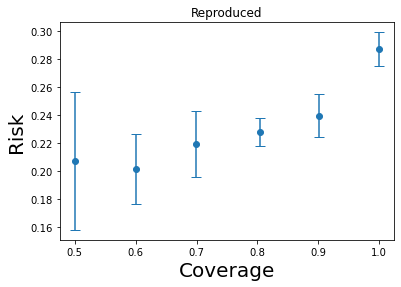

In [23]:
import matplotlib.pyplot as plt

def std(x):
    return np.std(x, ddof=1)

summary = calibration_results.pivot_table(index='coverage',aggfunc=[np.mean,std])

plt.errorbar(summary['mean']['calib_coverage'],
             summary['mean']['calib_empirical_risk'],
             yerr=summary['std']['calib_empirical_risk'], fmt='o', capsize=5)
plt.xlabel('Coverage', fontsize=20)
plt.ylabel('Risk', fontsize=20)
plt.title('Reproduced')

summary[[('mean','calib_empirical_risk'), ('std','calib_empirical_risk')]]

# Implementation + Transfer learning

In [63]:
c = 0.6

for fold_no, (train, test) in enumerate(kfold.get_folds('mordred')):
    break
    x_train, y_train, smiles_train = train
    x_test, y_test, smiles_test = test

    y_train = experimental_setup.scaler.fit_transform(y_train)

    # Base model
    # - Save model checkpoint
    # - Save results for LDToxDB
    model = sn_mordred(input_shape=x_train[0].shape)
    model.c_coverage = c
    model.epochs = 1000
    model.fit(x_train, y_train)
    
    y_hat = model.predict(x_test)[0]
    y_hat[:,0] = experimental_setup.scaler.inverse_transform(y_hat[:,0])
    
    tau = np.percentile(y_hat[:,1], 100*(1-c))
    
    results = pd.DataFrame({
        'smiles': smiles_test.flatten(),
        'prediction_neglogld50': y_hat[:,0].flatten(),
        'prediction_raw_g': y_hat[:,1].flatten(),
        'actual_neglogld50': y_test.flatten()
    })
    
    results['prediction_selected'] = results['prediction_raw_g'] >= tau
    results.loc[~results.prediction_selected, 'prediction_neglogld50'] = None
    
    fn = 'sn_mordred' + str(fold_no)
    results.to_csv('../data/selective-net/%s_predictions.csv' % fn)
    model.save_weights('../data/selective-net/chkpt/%s.chkpt' % fn)
   
##PFAS-LIKE
for fold_no, (train, test) in enumerate(kfold.get_folds('mordred', 'pfas_like')):
    x_train, y_train, smiles_train = train
    x_test, y_test, smiles_test = test

    y_train = experimental_setup.scaler.fit_transform(y_train)
    
    model = sn_mordred(input_shape=x_train[0].shape)
    model.c_coverage = c
    model.epochs = 100
    
    fn = 'sn_mordred' + str(fold_no)
    model.load_weights('../data/selective-net/chkpt/%s.chkpt' % fn)
    
    # Transfer model
    # - Save model checkpoint
    # - Save results for LDToxDB-PFAS-like

    # Apply transfer step base model modifications
    # (trial and error in SN has shown for this to improve performance)
    for layer in model.model.layers[:-6]:
        layer.trainable = False

    model.fit(x_train, y_train)

    y_hat = model.predict(x_test)[0]
    y_hat[:,0] = experimental_setup.scaler.inverse_transform(y_hat[:,0])

    tau = np.percentile(y_hat[:,1], 100*(1-c))
    
    results = pd.DataFrame({
        'smiles': smiles_test.flatten(),
        'prediction_neglogld50': y_hat[:,0].flatten(),
        'prediction_raw_neglogld50': y_hat[:,0].flatten(),
        'prediction_raw_g': y_hat[:,1].flatten(),
        'actual_neglogld50': y_test.flatten()
    })
    
    results['prediction_selected'] = results['prediction_raw_g'] >= tau
    results.loc[~results.prediction_selected, 'prediction_neglogld50'] = None
    
    
    fn = 'transfer_sn_mordred' + str(fold_no)
    model.save_weights('../data/selective-net/chkpt/%s.chkpt' % fn)
    results.to_csv('../data/selective-net/%s_predictions.csv' % fn)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4595 - selection_head_loss: 0.4104 - auxiliary_head_loss: 0.5086 - selection_head_selective_loss: 0.3819 - selection_head_empirical_risk: 0.2298 - selection_head_coverage: 0.5340
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2346 - selection_head_loss: 0.2559 - auxiliary_head_loss: 0.2134 - selection_head_selective_loss: 0.2498 - selection_head_empirical_risk: 0.1004 - selection_head_coverage: 0.5305
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1701 - selection_head_loss: 0.1702 - auxiliary_head_loss: 0.1701 - selection_head_selective_loss: 0.1914 - selection_head_empirical_risk: 0.0209 - selection_head_coverage: 0.5304
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1878 - selection_head_loss: 0.1861 - auxiliary_head_loss: 0.1895 - selection_head_selective_loss: 0.2222 - selection_head_empirical_risk: 0.0356 - selection_head_coverage:

2/2 [==============================] - 0s 3ms/step - loss: 0.0264 - selection_head_loss: 0.0509 - auxiliary_head_loss: 0.0018 - selection_head_selective_loss: 0.0621 - selection_head_empirical_risk: 0.0025 - selection_head_coverage: 0.5606
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0226 - selection_head_loss: 0.0434 - auxiliary_head_loss: 0.0018 - selection_head_selective_loss: 0.0484 - selection_head_empirical_risk: 0.0031 - selection_head_coverage: 0.5633
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0244 - selection_head_loss: 0.0470 - auxiliary_head_loss: 0.0018 - selection_head_selective_loss: 0.0401 - selection_head_empirical_risk: 0.0026 - selection_head_coverage: 0.5687
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0225 - selection_head_loss: 0.0432 - auxiliary_head_loss: 0.0018 - selection_head_selective_loss: 0.0385 - selection_head_empirical_risk: 0.0021 - selection_head_coverage: 0.5674
E

2/2 [==============================] - 0s 2ms/step - loss: 0.1237 - selection_head_loss: 0.2436 - auxiliary_head_loss: 0.0038 - selection_head_selective_loss: 0.3336 - selection_head_empirical_risk: 8.4221e-04 - selection_head_coverage: 0.5365    
Epoch 29/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0502 - selection_head_loss: 0.0968 - auxiliary_head_loss: 0.0036 - selection_head_selective_loss: 0.0764 - selection_head_empirical_risk: 7.4371e-04 - selection_head_coverage: 0.5683
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0515 - selection_head_loss: 0.0990 - auxiliary_head_loss: 0.0040 - selection_head_selective_loss: 0.1331 - selection_head_empirical_risk: 9.5776e-04 - selection_head_coverage: 0.5481
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0368 - selection_head_loss: 0.0697 - auxiliary_head_loss: 0.0039 - selection_head_selective_loss: 0.0566 - selection_head_empirical_risk: 0.0010 - selection_head_co

2/2 [==============================] - 0s 4ms/step - loss: 0.0304 - selection_head_loss: 0.0593 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0523 - selection_head_empirical_risk: 4.9773e-04 - selection_head_coverage: 0.5611
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0329 - selection_head_loss: 0.0641 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0773 - selection_head_empirical_risk: 4.7797e-04 - selection_head_coverage: 0.5539
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0359 - selection_head_loss: 0.0702 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0882 - selection_head_empirical_risk: 4.8370e-04 - selection_head_coverage: 0.5524
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0606 - selection_head_loss: 0.1197 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0943 - selection_head_empirical_risk: 4.8106e-04 - selection_head_co

2/2 [==============================] - 0s 2ms/step - loss: 0.4648 - selection_head_loss: 0.4930 - auxiliary_head_loss: 0.4367 - selection_head_selective_loss: 0.4852 - selection_head_empirical_risk: 0.2442 - selection_head_coverage: 0.5139
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3236 - selection_head_loss: 0.4577 - auxiliary_head_loss: 0.1896 - selection_head_selective_loss: 0.5283 - selection_head_empirical_risk: 0.1307 - selection_head_coverage: 0.5012
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2291 - selection_head_loss: 0.2779 - auxiliary_head_loss: 0.1804 - selection_head_selective_loss: 0.3020 - selection_head_empirical_risk: 0.0374 - selection_head_coverage: 0.5108
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2199 - selection_head_loss: 0.2306 - auxiliary_head_loss: 0.2092 - selection_head_selective_loss: 0.2125 - selection_head_empirical_risk: 0.0190 - selection_head_coverage: 0.5249
Epoc

2/2 [==============================] - 0s 2ms/step - loss: 0.1047 - selection_head_loss: 0.2078 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.2260 - selection_head_empirical_risk: 5.1183e-04 - selection_head_coverage: 0.5172
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1047 - selection_head_loss: 0.2078 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.2260 - selection_head_empirical_risk: 5.5933e-04 - selection_head_coverage: 0.5172
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1039 - selection_head_loss: 0.2061 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.1918 - selection_head_empirical_risk: 5.2153e-04 - selection_head_coverage: 0.5236
Epoch 52/100
2/2 [==============================] - ETA: 0s - loss: 0.1370 - selection_head_loss: 0.2724 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.2724 - selection_head_empirical_risk: 4.9557e-04 - selection_head_covera

2/2 [==============================] - 0s 2ms/step - loss: 0.0864 - selection_head_loss: 0.1477 - auxiliary_head_loss: 0.0251 - selection_head_selective_loss: 0.1421 - selection_head_empirical_risk: 0.0044 - selection_head_coverage: 0.5346
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0793 - selection_head_loss: 0.1345 - auxiliary_head_loss: 0.0240 - selection_head_selective_loss: 0.1299 - selection_head_empirical_risk: 0.0056 - selection_head_coverage: 0.5394
Epoch 13/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0898 - selection_head_loss: 0.1435 - auxiliary_head_loss: 0.0361 - selection_head_selective_loss: 0.1599 - selection_head_empirical_risk: 0.0110 - selection_head_coverage: 0.5363
Epoch 14/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0818 - selection_head_loss: 0.1315 - auxiliary_head_loss: 0.0321 - selection_head_selective_loss: 0.1432 - selection_head_empirical_risk: 0.0146 - selection_head_coverage: 0.5399
E

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - selection_head_loss: 0.0048 - auxiliary_head_loss: 0.0017 - selection_head_selective_loss: 0.0043 - selection_head_empirical_risk: 0.0022 - selection_head_coverage: 0.6217
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0035 - selection_head_loss: 0.0052 - auxiliary_head_loss: 0.0017 - selection_head_selective_loss: 0.0045 - selection_head_empirical_risk: 0.0021 - selection_head_coverage: 0.6226
Epoch 77/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - selection_head_loss: 0.0020 - auxiliary_head_loss: 0.0017 - selection_head_selective_loss: 0.0019 - selection_head_empirical_risk: 0.0019 - selection_head_coverage: 0.6167
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019 - selection_head_loss: 0.0021 - auxiliary_head_loss: 0.0017 - selection_head_selective_loss: 0.0021 - selection_head_empirical_risk: 0.0021 - selection_head_coverage: 0.6178
E

2/2 [==============================] - 0s 2ms/step - loss: 0.2947 - selection_head_loss: 0.2412 - auxiliary_head_loss: 0.3482 - selection_head_selective_loss: 0.2344 - selection_head_empirical_risk: 0.1955 - selection_head_coverage: 0.5659
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1531 - selection_head_loss: 0.1578 - auxiliary_head_loss: 0.1484 - selection_head_selective_loss: 0.1538 - selection_head_empirical_risk: 0.1146 - selection_head_coverage: 0.5656
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0959 - selection_head_loss: 0.0789 - auxiliary_head_loss: 0.1129 - selection_head_selective_loss: 0.0724 - selection_head_empirical_risk: 0.0346 - selection_head_coverage: 0.5659
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1080 - selection_head_loss: 0.0741 - auxiliary_head_loss: 0.1418 - selection_head_selective_loss: 0.0633 - selection_head_empirical_risk: 0.0146 - selection_head_coverage: 0.5733
Epoc

2/2 [==============================] - 0s 2ms/step - loss: 0.0018 - selection_head_loss: 9.8585e-04 - auxiliary_head_loss: 0.0026 - selection_head_selective_loss: 9.7315e-04 - selection_head_empirical_risk: 9.7315e-04 - selection_head_coverage: 0.6146
Epoch 35/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - selection_head_loss: 9.0272e-04 - auxiliary_head_loss: 0.0023 - selection_head_selective_loss: 8.8115e-04 - selection_head_empirical_risk: 8.8115e-04 - selection_head_coverage: 0.6104
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0016 - selection_head_loss: 9.6690e-04 - auxiliary_head_loss: 0.0023 - selection_head_selective_loss: 9.4939e-04 - selection_head_empirical_risk: 9.0310e-04 - selection_head_coverage: 0.6190
Epoch 37/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - selection_head_loss: 0.0065 - auxiliary_head_loss: 0.0023 - selection_head_selective_loss: 0.0080 - selection_head_empirical_risk: 8.8735

Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0018 - selection_head_loss: 0.0019 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0018 - selection_head_empirical_risk: 0.0018 - selection_head_coverage: 0.6381
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - selection_head_loss: 0.0026 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0024 - selection_head_empirical_risk: 0.0019 - selection_head_coverage: 0.6414
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0017 - selection_head_loss: 0.0018 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0018 - selection_head_empirical_risk: 0.0018 - selection_head_coverage: 0.6381
Epoch 99/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - selection_head_loss: 0.0065 - auxiliary_head_loss: 0.0016 - selection_head_selective_loss: 0.0078 - selection_head_empirical_risk: 0.0019 - selection_head_cover

In [68]:
calibration_results = pd.DataFrame()

c = 0.6
for fold_no, (train, test) in enumerate(kfold.get_folds('mordred', 'pfas_like')):
    results = pd.read_csv('../data/selective-net/transfer_sn_mordred' +
                         str(fold_no) + '_predictions.csv')
    
    y_test = results[['actual_neglogld50']].values
    y_hat = results[['prediction_raw_neglogld50','prediction_raw_g']].values
    
    tau = np.percentile(y_hat[:,1], 100*(1-c))
    
    calibration_results = calibration_results.append({
        'coverage': c,
        'pre_calib_coverage': calibrated_coverage(y_test, y_hat, 0.5),
        'pre_calib_empirical_risk': calibrated_empirical_risk(y_test, y_hat, 0.5),
        'calib_coverage': calibrated_coverage(y_test, y_hat, tau),
        'calib_empirical_risk': calibrated_empirical_risk(y_test, y_hat, tau),
        'tau': tau
    }, ignore_index=True)

In [69]:
calibration_results

,calib_coverage,calib_empirical_risk,coverage,pre_calib_coverage,pre_calib_empirical_risk,tau
0,0.598214,0.280084,0.6,0.500000,0.238563,4.046513e-08
1,0.603448,0.305691,0.6,0.586207,0.305459,6.848866e-05
2,0.601852,0.190502,0.6,0.407407,0.175162,2.107773e-23
3,0.595238,0.298162,0.6,0.678571,0.307892,9.999995e-01
4,0.626263,0.398567,0.6,0.626263,0.398567,1.000000e+00


# Predicting 8,000+ PFAS

In [5]:
from rdkit import Chem

# Import PFAS8k and classifications from ClassyFire
pfas8k = pd.read_csv('../data/pfas8k-mordred.csv')
pfas8k_cf = pd.read_csv('../data/pfas8k-classified.csv')
pfas8k['canon_smi'] = pfas8k.SMILES.apply(Chem.MolFromSmiles).apply(Chem.MolToSmiles)
pfas8k_cf['canon_smi'] = pfas8k_cf.smiles.apply(Chem.MolFromSmiles).dropna().apply(Chem.MolToSmiles)

pfas8k_results = pd.DataFrame()
c = 0.6

for fold_no, (train, test) in enumerate(kfold.get_folds('mordred', 'pfas_like')):       
    x_train, y_train, smiles_train = train
    x_test, y_test, smiles_test = test

    experimental_setup.scaler.fit(y_train)

    model = sn_mordred(input_shape=x_train[0].shape)
    
    fn = 'transfer_sn_mordred' + str(fold_no)
    model.load_weights('../data/selective-net/chkpt/%s.chkpt' % fn)
    
    y_hat = model.predict(x_test)[0]
    tau = np.percentile(y_hat[:,1], 100*(1-c))
    
    # Only selected Mordred cols were used filtered by column variance. Grab the columns used for this fold
    fold_cols = np.load('../data/preprocessed/random/fold%s_mordred_x_cols.npz' % fold_no, allow_pickle=True)['cols']
    
    # Some of the selected columns are non-applicable to compounds in PFAS 8k. Identify those compounds and drop them
    vals = pd.to_numeric(pfas8k[fold_cols].to_numpy().flatten(), errors='coerce').reshape(pfas8k[fold_cols].shape)
    vals = np.isnan(vals).any(axis=1)
    
    # Infer
    y_hat = model.predict(pfas8k.loc[~vals][fold_cols].to_numpy(dtype=np.float32))[0]
    y_hat[:,0] = experimental_setup.scaler.inverse_transform(y_hat[:,0])
    
    results = pd.DataFrame({
        'smiles': pfas8k.loc[~vals].canon_smi,
        'prediction_neglogld50': y_hat[:,0].flatten(),
        'prediction_raw_g': y_hat[:,1].flatten(),
        'prediction_selected': y_hat[:,1] >= tau,
        'fold': fold_no
    })
    
    results.loc[~results.prediction_selected, 'prediction_neglogld50'] = None
    results.loc[results.prediction_selected, 'prediction_epa'] = \
    converter.convert_to_epa(results.loc[results.prediction_selected][['prediction_neglogld50']].values,
                             results.loc[results.prediction_selected][['smiles']].values).astype(np.float32)
    
    
    pfas8k_results = pfas8k_results.append(results, ignore_index=True)

pfas8k_results = pfas8k_results.merge(pfas8k_cf, left_on='smiles', right_on='canon_smi')

..\src\experimental_setup.py:18: RuntimeWarning: overflow encountered in double_scalars
  yield (10**(-1*neglogld50[0]))*1000*molwt


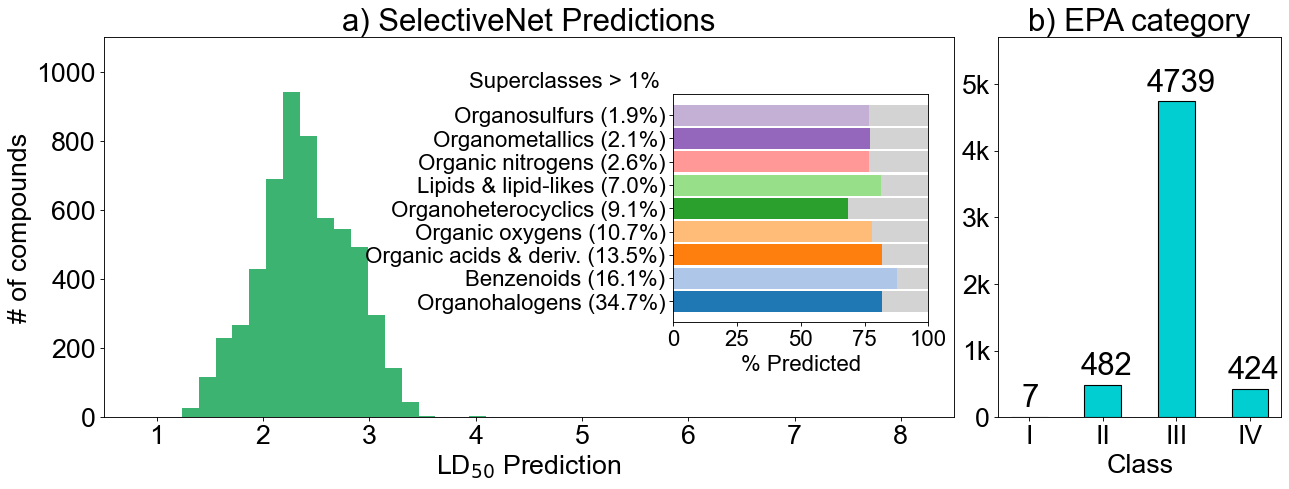

In [6]:
import matplotlib
import matplotlib.pyplot as plt

in_range = (-0.6986, 7.8262)

merged = pfas8k_results.loc[pfas8k_results.fold==3]
merged = merged.loc[
    (((merged.prediction_neglogld50 >= in_range[0])
      & (merged.prediction_neglogld50 <= in_range[1])) | (merged.prediction_neglogld50.isna()))]

plt.rc('font', weight='normal', size=24, family='Arial')

plt.rcParams['figure.facecolor'] = 'white'

# Figure layout with custom sizing
fig = plt.figure(figsize=(16,6), dpi=80, facecolor='white', constrained_layout=True)
gs = fig.add_gridspec(1, 20)
ax = fig.add_subplot(gs[:,:15])
ax2 = fig.add_subplot(gs[:,15:])

# Histogram for plot (A)
ax.hist(merged['prediction_neglogld50'].dropna(), bins=50, color='mediumseagreen')
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xlim((0.5,8.5))
ax.set_ylim(0,1100)
ax.set_xlabel('LD$_{50}$ Prediction')
ax.set_ylabel('# of compounds')
ax.set_title('a) SelectiveNet Predictions', fontsize=28)

# Percentage bars for plot (A) inset
axin = ax.inset_axes([0.67,0.25,0.3,0.6])
value_counts = merged['superclass'].value_counts(normalize=True)

cmap = plt.cm.tab20
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(value_counts)-1)

ind = 0

for (num, label), pct in zip(enumerate(value_counts[:9].index), value_counts[:9]*100):
    ind = ind+1
    
    if pct < 1:
        break

    predicted = len(merged.loc[(merged['superclass']==label) & (merged.prediction_selected)]) /\
        len(merged.loc[merged['superclass']==label])

    axin.barh(ind, predicted, 0.9, color = cmap(norm(num)))
    axin.barh(ind, (1-predicted), 0.9, left=predicted, color='lightgrey')

# Helper to shorten superclass category names
replace_with = [
    (' compounds', 's'),
    (' molecules', 's'),
    ('derivatives', 'deriv.'),
    ('and', '&')
]

def replace_all(text, needle_tuple):
    for i, j in needle_tuple:
        text = text.replace(i, j)
    return text

ticklabels = ['%s (%0.1f%%)' % (s,f) for s,f in zip(value_counts[:9].index.tolist(), value_counts[:9].values*100)]
ticklabels = [replace_all(label, replace_with) for label in ticklabels]

axin.set_yticks([1,2,3,4,5,6,7,8,9])
axin.set_yticklabels(ticklabels, fontsize=20)
axin.set_xlim((0,1))
axin.set_xticks([0,0.25,0.5,0.75,1])
axin.set_xticklabels([0,25,50,75,100], fontsize=20)
axin.set_xlabel('% Predicted', fontsize=20)
axin.text(-0.8, 10.2, 'Superclasses > 1%', fontsize=20)

# Barplot for plot (B)
levels_vc = merged['prediction_epa'].value_counts()
accepted = levels_vc.loc[0], levels_vc.loc[1], levels_vc.loc[2], levels_vc.loc[3]

ax2.bar(np.array([0,1,2,3])
        , accepted, width=0.5, label='All', color='darkturquoise',edgecolor='black')
ax2.set_xticks(np.array([0,1,2,3]))
ax2.set_xticklabels(['I', 'II', 'III', 'IV'])
ax2.set_xlabel('Class')
ax2.set_title('b) EPA category',fontsize=28)
ax2.set_ylim((0,5700))
ax2.set_yticks([0,1000,2000,3000,4000, 5000])
ax2.set_yticklabels(['0','1k','2k','3k','4k','5k'])

for i, level in enumerate(['I', 'II', 'III', 'IV']):
    ax2.text(x=i-(0.1*len(str(accepted[i]))), y=accepted[i]+150, s=str(accepted[i]), fontsize=28)

In [7]:
table = [
    'OC(=O)C(F)(F)C(F)(F)C(F)(F)F',
    'FC1(F)C(Cl)=C(Cl)C(F)(F)C1(F)F',
    'FC(F)(F)C(F)(F)C(Cl)Cl',
    'FC(F)OC(F)(F)C(F)Cl',
    'FC(F)(F)C(=O)C(F)(F)F',
    'COC(F)(F)C(C(F)(F)F)C(F)(F)F',
    'NC1=NC(NC1(C(F)(F)F)C(F)(F)F)(C(F)(F)F)C(F)(F)F',
    'OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
    'FC(F)C(F)(F)COC(=O)C(F)=C',
    'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F'
]

table = pd.DataFrame({'smiles': table})
table['mol'] = table.smiles.apply(Chem.MolFromSmiles)
table['canon_smi'] = table.smiles.apply(Chem.MolFromSmiles).apply(Chem.MolToSmiles)

table.merge(merged, left_on='canon_smi', right_on='canon_smi')[['canon_smi','mol','prediction_selected','prediction_epa']]

,canon_smi,mol,prediction_selected,prediction_epa
0,O=C(O)C(F)(F)C(F)(F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,True,2.0
1,FC1(F)C(Cl)=C(Cl)C(F)(F)C1(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,True,1.0
2,FC(F)(F)C(F)(F)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,True,3.0
3,FC(F)OC(F)(F)C(F)Cl,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,True,3.0
4,O=C(C(F)(F)F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,False,NaN
5,COC(F)(F)C(C(F)(F)F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,True,1.0
6,NC1=NC(C(F)(F)F)(C(F)(F)F)NC1(C(F)(F)F)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,False,NaN
7,O=C(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,False,NaN
8,C=C(F)C(=O)OCC(F)(F)C(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,False,NaN
9,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,<rdkit.Chem.rdchem.Mol object at 0x000001EE82A...,True,3.0


In [10]:
len(merged)

7015